In [302]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle
from urllib.request import urlopen
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all(True,{'class':["entry","cPQsENeY"]})]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://www.tripadvisor.com.ph/ShowUserReviews-g190320-r29249253-Island_of_Malta.html',
        'https://www.tripadvisor.com.ph/Attraction_Review-g60763-d8492560-Reviews-Columbus_Circle-New_York_City_New_York.html',
        'https://www.tripadvisor.com.ph/ShowUserReviews-g186370-r83848268-Bath_Somerset_England.html',
        'https://www.tripadvisor.com.ph/ShowUserReviews-g187497-r37093135-Barcelona_Catalonia.html',
        'https://www.tripadvisor.com.ph/Hotel_Review-g189922-d2151632-Reviews-Santa_Claus_Holiday_Village-Rovaniemi_Lapland.html',
        'https://www.tripadvisor.com.ph/ShowUserReviews-g187310-r24456415-Nuremberg_Middle_Franconia_Franconia_Bavaria.html',
        'https://www.tripadvisor.com.ph/Attraction_Review-g60982-d10020617-Reviews-Honolulu_City_Lights-Honolulu_Oahu_Hawaii.html',
        'https://www.tripadvisor.com.ph/Attraction_Review-g155033-d573466-Reviews-Old_Quebec-Quebec_City_Quebec.html',
        'https://www.tripadvisor.com.ph/ShowUserReviews-g189970-r10258274-Reykjavik_Capital_Region.html',
        'https://www.tripadvisor.com.ph/Attraction_Review-g151932-d3535716-Reviews-San_Miguel_Allende_Tours-San_Miguel_de_Allende_Central_Mexico_and_Gulf_Coast.html#REVIEWS',
        'https://www.tripadvisor.com.ph/Attraction_Review-g1012029-d195685-Reviews-Silent_Night_Chapel_Stille_Nacht_Kapelle-Oberndorf_bei_Salzburg_Austrian_Alps.html#REVIEWS',
        'https://www.tripadvisor.com.ph/ShowUserReviews-g37506-r69128425-Santa_Claus_Indiana.html',
        'https://www.tripadvisor.com.ph/Attraction_Review-g187075-d10387470-Reviews-Centre_ville_de_Strasbourg-Strasbourg_Bas_Rhin_Grand_Est.html#REVIEWS',
        'https://www.tripadvisor.com.ph/Attraction_Review-g255122-d258128-Reviews-Lake_Wakatipu-Queenstown_Otago_Region_South_Island.html#REVIEWS',
        'https://www.tripadvisor.com.ph/Attraction_Review-g227912-d2457239-Reviews-Castle_Ruins_Velvet_Cave-Valkenburg_Limburg_Province.html#REVIEWS'
       ]

places = ['Malta','Columbus Circle','Bath England','Barcelona Spain','Rovaniemi Lapland','Nuremberg','Honolulu', 'Old Quebec City','Reykjavik Iceland','San Miguel de Allende','Salzburg Obendorf','Santa Claus Indiana','Strasbourg France','Queenstown New Zealand','Valkenburg The Netherlands' ]

In [303]:
 # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://www.tripadvisor.com.ph/ShowUserReviews-g190320-r29249253-Island_of_Malta.html
https://www.tripadvisor.com.ph/Attraction_Review-g60763-d8492560-Reviews-Columbus_Circle-New_York_City_New_York.html
https://www.tripadvisor.com.ph/ShowUserReviews-g186370-r83848268-Bath_Somerset_England.html
https://www.tripadvisor.com.ph/ShowUserReviews-g187497-r37093135-Barcelona_Catalonia.html
https://www.tripadvisor.com.ph/Hotel_Review-g189922-d2151632-Reviews-Santa_Claus_Holiday_Village-Rovaniemi_Lapland.html
https://www.tripadvisor.com.ph/ShowUserReviews-g187310-r24456415-Nuremberg_Middle_Franconia_Franconia_Bavaria.html
https://www.tripadvisor.com.ph/Attraction_Review-g60982-d10020617-Reviews-Honolulu_City_Lights-Honolulu_Oahu_Hawaii.html
https://www.tripadvisor.com.ph/Attraction_Review-g155033-d573466-Reviews-Old_Quebec-Quebec_City_Quebec.html
https://www.tripadvisor.com.ph/ShowUserReviews-g189970-r10258274-Reykjavik_Capital_Region.html
https://www.tripadvisor.com.ph/Attraction_Review-g151932

In [304]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(places):
     with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [305]:
# Load pickled files
data = {}
for i, c in enumerate(places):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [306]:
data.keys()

dict_keys(['Malta', 'Columbus Circle', 'Bath England', 'Barcelona Spain', 'Rovaniemi Lapland', 'Nuremberg', 'Honolulu', 'Old Quebec City', 'Reykjavik Iceland', 'San Miguel de Allende', 'Salzburg Obendorf', 'Santa Claus Indiana', 'Strasbourg France', 'Queenstown New Zealand', 'Valkenburg The Netherlands'])

In [307]:
data['Rovaniemi Lapland'][:3]

["Hotel-standard cottage accommodation at the Arctic Circle, heart of Santa Claus Village. Our cabins are all equipped with up-to-date facilities, such as private saunas, bathrooms, kitchenette and terrace. There's no better way to enjoy your stay. From your cabin just a minute or two walk to Santa Claus Main Office. All activities & excursions, such as Reindeer rides, Husky dog sledge rides, snowmobile rides, etc.. available on the village.",
 "The cottage is ideal for a family with small kids. It's spacious and within a very short walking distance (5 min) from the Santa Claus office. The cottage has a small sauna, too. The kitchenette wasn't very modern, though. Very easy parking just next to your cottage.  If only had the breakfast been better, I could have given five points for great value. Unfortunately the selection was a bit dull, even though rice porridge was nice.",
 "Family of 4 - Kids aged 10 and 5.  We stayed in a Superior Cottage at Santa Claus Village for a week, and it w

In [308]:
next(iter(data.keys()))

'Malta'

In [309]:
next(iter(data.values()))

["\n\nUnfortunately, Malta really has let itself down as a holiday destination. The top rated hotels are fine. The problems begin when you leave them. The beaches, and there aren't many, are very dirty, and not cleaned nearly often enough. The same of the pavements and streets. They have a serious traffic issue, and any coast walk is marred by the road noise. There seems to be no enforcement of exhaust and emissions, so you are bombarded by black diesel fumes and blowing exhausts, compounded by booming stereos. The roads are in a terrible condition if you hire a car. However, you don't need to hire a car as there is nothing to see on the island. The towns of Valetta and Mdina are really the only places worth a visit ( and really do deliver on experience ) and you can do this by bus. The other thing to do is take a cruise around Grand Harbour, it's very nice. Other than that, if Malta does have some hidden charm, it's well hidden indeed. The Maltese in general are very pleasant people. 

In [310]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [311]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [312]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150) 

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['Reviews']
data_df = data_df.sort_index()
data_df

,Reviews
Barcelona Spain,"\n\nWe were in Barcelona in Sept. 2007 & I must say it was the best European trip I have ever been on. We stayed for 5 days, there were lots to se..."
Bath England,\n\nLast August I visited the city of Bath in Somerset. This city is situated on the banks of the beautiful River Avon with its lovely step-like w...
Columbus Circle,"Your friendly neighborhood liquor store. Excellent service, wide selection and reasonable prices to boot. We were staying near this area and walke..."
Honolulu,"Christmas in Honolulu, WOW. I live in Indiana and at Christmas time it is always cold. See the trees and exhibits in sunny Hawaii was great. Th..."
Malta,"\n\nUnfortunately, Malta really has let itself down as a holiday destination. The top rated hotels are fine. The problems begin when you leave the..."
Nuremberg,"\n\nNürnberg is my second most-favorite city. It is very close to my favorite city, Edinburgh, Scotland, but that is merely familial, both sides b..."
Old Quebec City,Lovely and quaint with beautiful shops and restaurants. It is sophisticated and charming. The castle in background adds to the charm. Don’t miss ...
Queenstown New Zealand,The lake and the surrounding area is just stunning. It is definitely worth stopping at a few different locations around the lake to take in the vi...
Reykjavik Iceland,"\n\nReykjavik, Iceland is a real special place to visit. Not only for the absolutely beautiful people, but for reindeer and whale meat too.I was t..."
Rovaniemi Lapland,"Hotel-standard cottage accommodation at the Arctic Circle, heart of Santa Claus Village. Our cabins are all equipped with up-to-date facilities, s..."


In [313]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [314]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.Reviews.apply(round1))
data_clean

,Reviews
Barcelona Spain,\n\nwe were in barcelona in sept i must say it was the best european trip i have ever been on we stayed for days there were lots to see do in...
Bath England,\n\nlast august i visited the city of bath in somerset this city is situated on the banks of the beautiful river avon with its lovely steplike wat...
Columbus Circle,your friendly neighborhood liquor store excellent service wide selection and reasonable prices to boot we were staying near this area and walked t...
Honolulu,christmas in honolulu wow i live in indiana and at christmas time it is always cold see the trees and exhibits in sunny hawaii was great the tr...
Malta,\n\nunfortunately malta really has let itself down as a holiday destination the top rated hotels are fine the problems begin when you leave them t...
Nuremberg,\n\nnürnberg is my second mostfavorite city it is very close to my favorite city edinburgh scotland but that is merely familial both sides being o...
Old Quebec City,lovely and quaint with beautiful shops and restaurants it is sophisticated and charming the castle in background adds to the charm don’t miss out...
Queenstown New Zealand,the lake and the surrounding area is just stunning it is definitely worth stopping at a few different locations around the lake to take in the vie...
Reykjavik Iceland,\n\nreykjavik iceland is a real special place to visit not only for the absolutely beautiful people but for reindeer and whale meat tooi was there...
Rovaniemi Lapland,hotelstandard cottage accommodation at the arctic circle heart of santa claus village our cabins are all equipped with uptodate facilities such as...


In [315]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [316]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.Reviews.apply(round2))
data_clean

,Reviews
Barcelona Spain,we were in barcelona in sept i must say it was the best european trip i have ever been on we stayed for days there were lots to see do incl...
Bath England,last august i visited the city of bath in somerset this city is situated on the banks of the beautiful river avon with its lovely steplike water...
Columbus Circle,your friendly neighborhood liquor store excellent service wide selection and reasonable prices to boot we were staying near this area and walked t...
Honolulu,christmas in honolulu wow i live in indiana and at christmas time it is always cold see the trees and exhibits in sunny hawaii was great the tr...
Malta,unfortunately malta really has let itself down as a holiday destination the top rated hotels are fine the problems begin when you leave them the...
Nuremberg,nürnberg is my second mostfavorite city it is very close to my favorite city edinburgh scotland but that is merely familial both sides being of ...
Old Quebec City,lovely and quaint with beautiful shops and restaurants it is sophisticated and charming the castle in background adds to the charm dont miss out ...
Queenstown New Zealand,the lake and the surrounding area is just stunning it is definitely worth stopping at a few different locations around the lake to take in the vie...
Reykjavik Iceland,reykjavik iceland is a real special place to visit not only for the absolutely beautiful people but for reindeer and whale meat tooi was there i...
Rovaniemi Lapland,hotelstandard cottage accommodation at the arctic circle heart of santa claus village our cabins are all equipped with uptodate facilities such as...


In [317]:
# Let's take a look at our dataframe
data_df

,Reviews
Barcelona Spain,"\n\nWe were in Barcelona in Sept. 2007 & I must say it was the best European trip I have ever been on. We stayed for 5 days, there were lots to se..."
Bath England,\n\nLast August I visited the city of Bath in Somerset. This city is situated on the banks of the beautiful River Avon with its lovely step-like w...
Columbus Circle,"Your friendly neighborhood liquor store. Excellent service, wide selection and reasonable prices to boot. We were staying near this area and walke..."
Honolulu,"Christmas in Honolulu, WOW. I live in Indiana and at Christmas time it is always cold. See the trees and exhibits in sunny Hawaii was great. Th..."
Malta,"\n\nUnfortunately, Malta really has let itself down as a holiday destination. The top rated hotels are fine. The problems begin when you leave the..."
Nuremberg,"\n\nNürnberg is my second most-favorite city. It is very close to my favorite city, Edinburgh, Scotland, but that is merely familial, both sides b..."
Old Quebec City,Lovely and quaint with beautiful shops and restaurants. It is sophisticated and charming. The castle in background adds to the charm. Don’t miss ...
Queenstown New Zealand,The lake and the surrounding area is just stunning. It is definitely worth stopping at a few different locations around the lake to take in the vi...
Reykjavik Iceland,"\n\nReykjavik, Iceland is a real special place to visit. Not only for the absolutely beautiful people, but for reindeer and whale meat too.I was t..."
Rovaniemi Lapland,"Hotel-standard cottage accommodation at the Arctic Circle, heart of Santa Claus Village. Our cabins are all equipped with up-to-date facilities, s..."


In [318]:
# Let's add the place as well
place = ['Barcelona Spain','Bath England','Columbus Circle','Honolulu','Malta','Nuremberg','Old Quebec City', 'Queenstown New Zealand','Reykjavik Iceland','Rovaniemi Lapland','Salzburg Obendorf','San Miguel de Allende','Santa Claus Indiana','Strasbourg France','Valkenburg, The Netherlands' ]

data_df['place'] = place
data_df

,Reviews,place
Barcelona Spain,"\n\nWe were in Barcelona in Sept. 2007 & I must say it was the best European trip I have ever been on. We stayed for 5 days, there were lots to se...",Barcelona Spain
Bath England,\n\nLast August I visited the city of Bath in Somerset. This city is situated on the banks of the beautiful River Avon with its lovely step-like w...,Bath England
Columbus Circle,"Your friendly neighborhood liquor store. Excellent service, wide selection and reasonable prices to boot. We were staying near this area and walke...",Columbus Circle
Honolulu,"Christmas in Honolulu, WOW. I live in Indiana and at Christmas time it is always cold. See the trees and exhibits in sunny Hawaii was great. Th...",Honolulu
Malta,"\n\nUnfortunately, Malta really has let itself down as a holiday destination. The top rated hotels are fine. The problems begin when you leave the...",Malta
Nuremberg,"\n\nNürnberg is my second most-favorite city. It is very close to my favorite city, Edinburgh, Scotland, but that is merely familial, both sides b...",Nuremberg
Old Quebec City,Lovely and quaint with beautiful shops and restaurants. It is sophisticated and charming. The castle in background adds to the charm. Don’t miss ...,Old Quebec City
Queenstown New Zealand,The lake and the surrounding area is just stunning. It is definitely worth stopping at a few different locations around the lake to take in the vi...,Queenstown New Zealand
Reykjavik Iceland,"\n\nReykjavik, Iceland is a real special place to visit. Not only for the absolutely beautiful people, but for reindeer and whale meat too.I was t...",Reykjavik Iceland
Rovaniemi Lapland,"Hotel-standard cottage accommodation at the Arctic Circle, heart of Santa Claus Village. Our cabins are all equipped with up-to-date facilities, s...",Rovaniemi Lapland


In [319]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [320]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.Reviews)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abby,abes,able,abomination,abruptly,absent,absolute,absolutely,absorb,absurd,...,yes,yesterday,yhe,york,yoube,youbehind,young,youre,zeppis,zone
Barcelona Spain,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,0
Bath England,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Columbus Circle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honolulu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malta,0,0,0,0,1,1,0,0,0,0,...,2,1,0,0,0,0,0,0,1,0
Nuremberg,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Old Quebec City,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Queenstown New Zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Reykjavik Iceland,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
Rovaniemi Lapland,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [321]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [322]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [323]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Barcelona Spain,Bath England,Columbus Circle,Honolulu,Malta,Nuremberg,Old Quebec City,Queenstown New Zealand,Reykjavik Iceland,Rovaniemi Lapland,Salzburg Obendorf,San Miguel de Allende,Santa Claus Indiana,Strasbourg France,Valkenburg The Netherlands
abby,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
abes,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
able,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
abomination,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
abruptly,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [324]:
# Find the top 30 words in each review
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Barcelona Spain': [('barcelona', 14),
  ('city', 8),
  ('beach', 6),
  ('just', 6),
  ('dont', 4),
  ('friend', 4),
  ('days', 4),
  ('scene', 4),
  ('las', 4),
  ('ramblas', 4),
  ('stayed', 3),
  ('say', 3),
  ('pretty', 3),
  ('thing', 3),
  ('madrid', 3),
  ('like', 3),
  ('literally', 3),
  ('drink', 3),
  ('great', 3),
  ('happy', 3),
  ('time', 3),
  ('party', 3),
  ('really', 3),
  ('clubs', 3),
  ('went', 2),
  ('pickpockets', 2),
  ('basically', 2),
  ('places', 2),
  ('trip', 2),
  ('centre', 2)],
 'Bath England': [('bath', 9),
  ('city', 6),
  ('time', 6),
  ('baths', 6),
  ('built', 6),
  ('architecture', 5),
  ('beautiful', 5),
  ('ancient', 4),
  ('georgian', 4),
  ('room', 4),
  ('roman', 4),
  ('did', 4),
  ('river', 4),
  ('avon', 4),
  ('bridge', 3),
  ('train', 3),
  ('uk', 3),
  ('lovely', 3),
  ('day', 3),
  ('breakfast', 3),
  ('houses', 3),
  ('manor', 3),
  ('water', 3),
  ('come', 3),
  ('number', 2),
  ('cheese', 2),
  ('need', 2),
  ('special', 2),
  ('peo

In [325]:
# Print the top 15 words in each review
for places, top_words in top_dict.items():
    print(places)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Barcelona Spain
barcelona, city, beach, just, dont, friend, days, scene, las, ramblas, stayed, say, pretty, thing
---
Bath England
bath, city, time, baths, built, architecture, beautiful, ancient, georgian, room, roman, did, river, avon
---
Columbus Circle
area, carriages, columbus, near, drawn, park, horse, safe, nice, shops, busy, circle, times, walked
---
Honolulu
trees, christmas, great, time, decorated, gets, city, fun, hawaii, year, beautifully, like, lights, beautiful
---
Malta
malta, bus, maltese, visit, hotel, st, island, like, local, place, city, feeling, holiday, buildings
---
Nuremberg
city, nürnberg, old, know, cities, german, second, castle, bavaria, famous, wonderful, emperor, let, europe
---
Old Quebec City
streets, dont, city, history, restaurants, different, pricey, prices, beautiful, lots, like, walk, quaint, shops
---
Queenstown New Zealand
lake, area, queenstown, walkingrunningbike, sit, view, cruise, views, explore, reason, memorable, recommend, matter, wakatipu
-

In [326]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each review
words = []
for places in data.columns:
    top = [word for (word, count) in top_dict[places]]
    for t in top:
        words.append(t)
        
words

['barcelona',
 'city',
 'beach',
 'just',
 'dont',
 'friend',
 'days',
 'scene',
 'las',
 'ramblas',
 'stayed',
 'say',
 'pretty',
 'thing',
 'madrid',
 'like',
 'literally',
 'drink',
 'great',
 'happy',
 'time',
 'party',
 'really',
 'clubs',
 'went',
 'pickpockets',
 'basically',
 'places',
 'trip',
 'centre',
 'bath',
 'city',
 'time',
 'baths',
 'built',
 'architecture',
 'beautiful',
 'ancient',
 'georgian',
 'room',
 'roman',
 'did',
 'river',
 'avon',
 'bridge',
 'train',
 'uk',
 'lovely',
 'day',
 'breakfast',
 'houses',
 'manor',
 'water',
 'come',
 'number',
 'cheese',
 'need',
 'special',
 'people',
 'best',
 'area',
 'carriages',
 'columbus',
 'near',
 'drawn',
 'park',
 'horse',
 'safe',
 'nice',
 'shops',
 'busy',
 'circle',
 'times',
 'walked',
 'central',
 'felt',
 'night',
 'statue',
 'hearts',
 'staying',
 'service',
 'self',
 'selfies',
 'friendly',
 'watch',
 'selection',
 'water',
 'just',
 'way',
 'plenty',
 'trees',
 'christmas',
 'great',
 'time',
 'decorated',

In [327]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('city', 9),
 ('time', 9),
 ('just', 6),
 ('really', 6),
 ('beautiful', 6),
 ('like', 5),
 ('way', 5),
 ('good', 5),
 ('great', 4),
 ('nice', 4),
 ('walking', 4),
 ('tour', 4),
 ('visit', 4),
 ('interesting', 4),
 ('walk', 4),
 ('days', 3),
 ('went', 3),
 ('day', 3),
 ('night', 3),
 ('fun', 3),
 ('holiday', 3),
 ('place', 3),
 ('history', 3),
 ('little', 3),
 ('museum', 3),
 ('worth', 3),
 ('center', 3),
 ('different', 3),
 ('family', 3),
 ('dont', 2),
 ('trip', 2),
 ('built', 2),
 ('roman', 2),
 ('did', 2),
 ('train', 2),
 ('lovely', 2),
 ('breakfast', 2),
 ('water', 2),
 ('need', 2),
 ('people', 2),
 ('best', 2),
 ('area', 2),
 ('near', 2),
 ('park', 2),
 ('shops', 2),
 ('times', 2),
 ('walked', 2),
 ('central', 2),
 ('service', 2),
 ('friendly', 2),
 ('christmas', 2),
 ('bus', 2),
 ('island', 2),
 ('local', 2),
 ('world', 2),
 ('castle', 2),
 ('wonderful', 2),
 ('restaurants', 2),
 ('definitely', 2),
 ('views', 2),
 ('walks', 2),
 ('market', 2),
 ('enjoy', 2),
 ('weather', 2),
 ('s

In [328]:
# If more than half of the review have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['city', 'time']

In [329]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Reviews)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [330]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

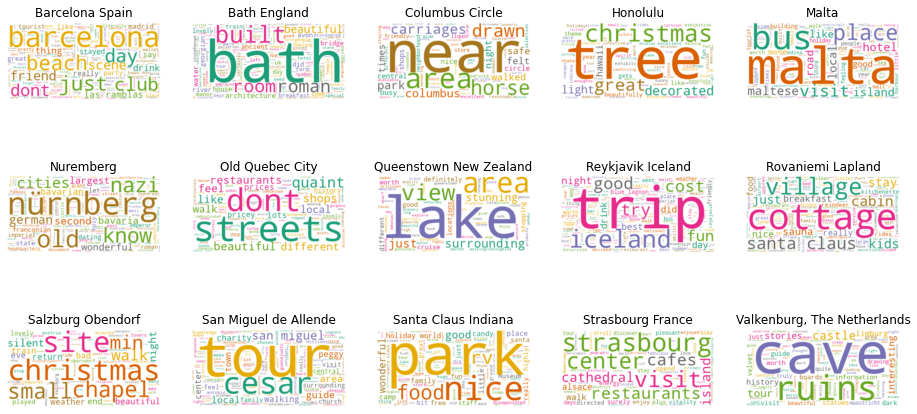

In [331]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]

place = ['Barcelona Spain','Bath England','Columbus Circle','Honolulu','Malta','Nuremberg','Old Quebec City', 'Queenstown New Zealand','Reykjavik Iceland','Rovaniemi Lapland','Salzburg Obendorf','San Miguel de Allende','Santa Claus Indiana','Strasbourg France','Valkenburg, The Netherlands' ]

# Create subplots for each review
for index, places in enumerate(data.columns):
    wc.generate(data_clean.Reviews[places])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(place[index])
    
plt.show()

In [332]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,Reviews,place
Barcelona Spain,"\n\nWe were in Barcelona in Sept. 2007 & I must say it was the best European trip I have ever been on. We stayed for 5 days, there were lots to se...",Barcelona Spain
Bath England,\n\nLast August I visited the city of Bath in Somerset. This city is situated on the banks of the beautiful River Avon with its lovely step-like w...,Bath England
Columbus Circle,"Your friendly neighborhood liquor store. Excellent service, wide selection and reasonable prices to boot. We were staying near this area and walke...",Columbus Circle
Honolulu,"Christmas in Honolulu, WOW. I live in Indiana and at Christmas time it is always cold. See the trees and exhibits in sunny Hawaii was great. Th...",Honolulu
Malta,"\n\nUnfortunately, Malta really has let itself down as a holiday destination. The top rated hotels are fine. The problems begin when you leave the...",Malta
Nuremberg,"\n\nNürnberg is my second most-favorite city. It is very close to my favorite city, Edinburgh, Scotland, but that is merely familial, both sides b...",Nuremberg
Old Quebec City,Lovely and quaint with beautiful shops and restaurants. It is sophisticated and charming. The castle in background adds to the charm. Don’t miss ...,Old Quebec City
Queenstown New Zealand,The lake and the surrounding area is just stunning. It is definitely worth stopping at a few different locations around the lake to take in the vi...,Queenstown New Zealand
Reykjavik Iceland,"\n\nReykjavik, Iceland is a real special place to visit. Not only for the absolutely beautiful people, but for reindeer and whale meat too.I was t...",Reykjavik Iceland
Rovaniemi Lapland,"Hotel-standard cottage accommodation at the Arctic Circle, heart of Santa Claus Village. Our cabins are all equipped with up-to-date facilities, s...",Rovaniemi Lapland


In [333]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Reviews'].apply(pol)
data['subjectivity'] = data['Reviews'].apply(sub)
data

,Reviews,place,polarity,subjectivity
Barcelona Spain,"\n\nWe were in Barcelona in Sept. 2007 & I must say it was the best European trip I have ever been on. We stayed for 5 days, there were lots to se...",Barcelona Spain,0.220189,0.542392
Bath England,\n\nLast August I visited the city of Bath in Somerset. This city is situated on the banks of the beautiful River Avon with its lovely step-like w...,Bath England,0.358447,0.580836
Columbus Circle,"Your friendly neighborhood liquor store. Excellent service, wide selection and reasonable prices to boot. We were staying near this area and walke...",Columbus Circle,0.269708,0.497597
Honolulu,"Christmas in Honolulu, WOW. I live in Indiana and at Christmas time it is always cold. See the trees and exhibits in sunny Hawaii was great. Th...",Honolulu,0.333719,0.653026
Malta,"\n\nUnfortunately, Malta really has let itself down as a holiday destination. The top rated hotels are fine. The problems begin when you leave the...",Malta,0.108860,0.451064
Nuremberg,"\n\nNürnberg is my second most-favorite city. It is very close to my favorite city, Edinburgh, Scotland, but that is merely familial, both sides b...",Nuremberg,0.109673,0.441475
Old Quebec City,Lovely and quaint with beautiful shops and restaurants. It is sophisticated and charming. The castle in background adds to the charm. Don’t miss ...,Old Quebec City,0.353212,0.609028
Queenstown New Zealand,The lake and the surrounding area is just stunning. It is definitely worth stopping at a few different locations around the lake to take in the vi...,Queenstown New Zealand,0.302991,0.652626
Reykjavik Iceland,"\n\nReykjavik, Iceland is a real special place to visit. Not only for the absolutely beautiful people, but for reindeer and whale meat too.I was t...",Reykjavik Iceland,0.243763,0.493942
Rovaniemi Lapland,"Hotel-standard cottage accommodation at the Arctic Circle, heart of Santa Claus Village. Our cabins are all equipped with up-to-date facilities, s...",Rovaniemi Lapland,0.232470,0.562634


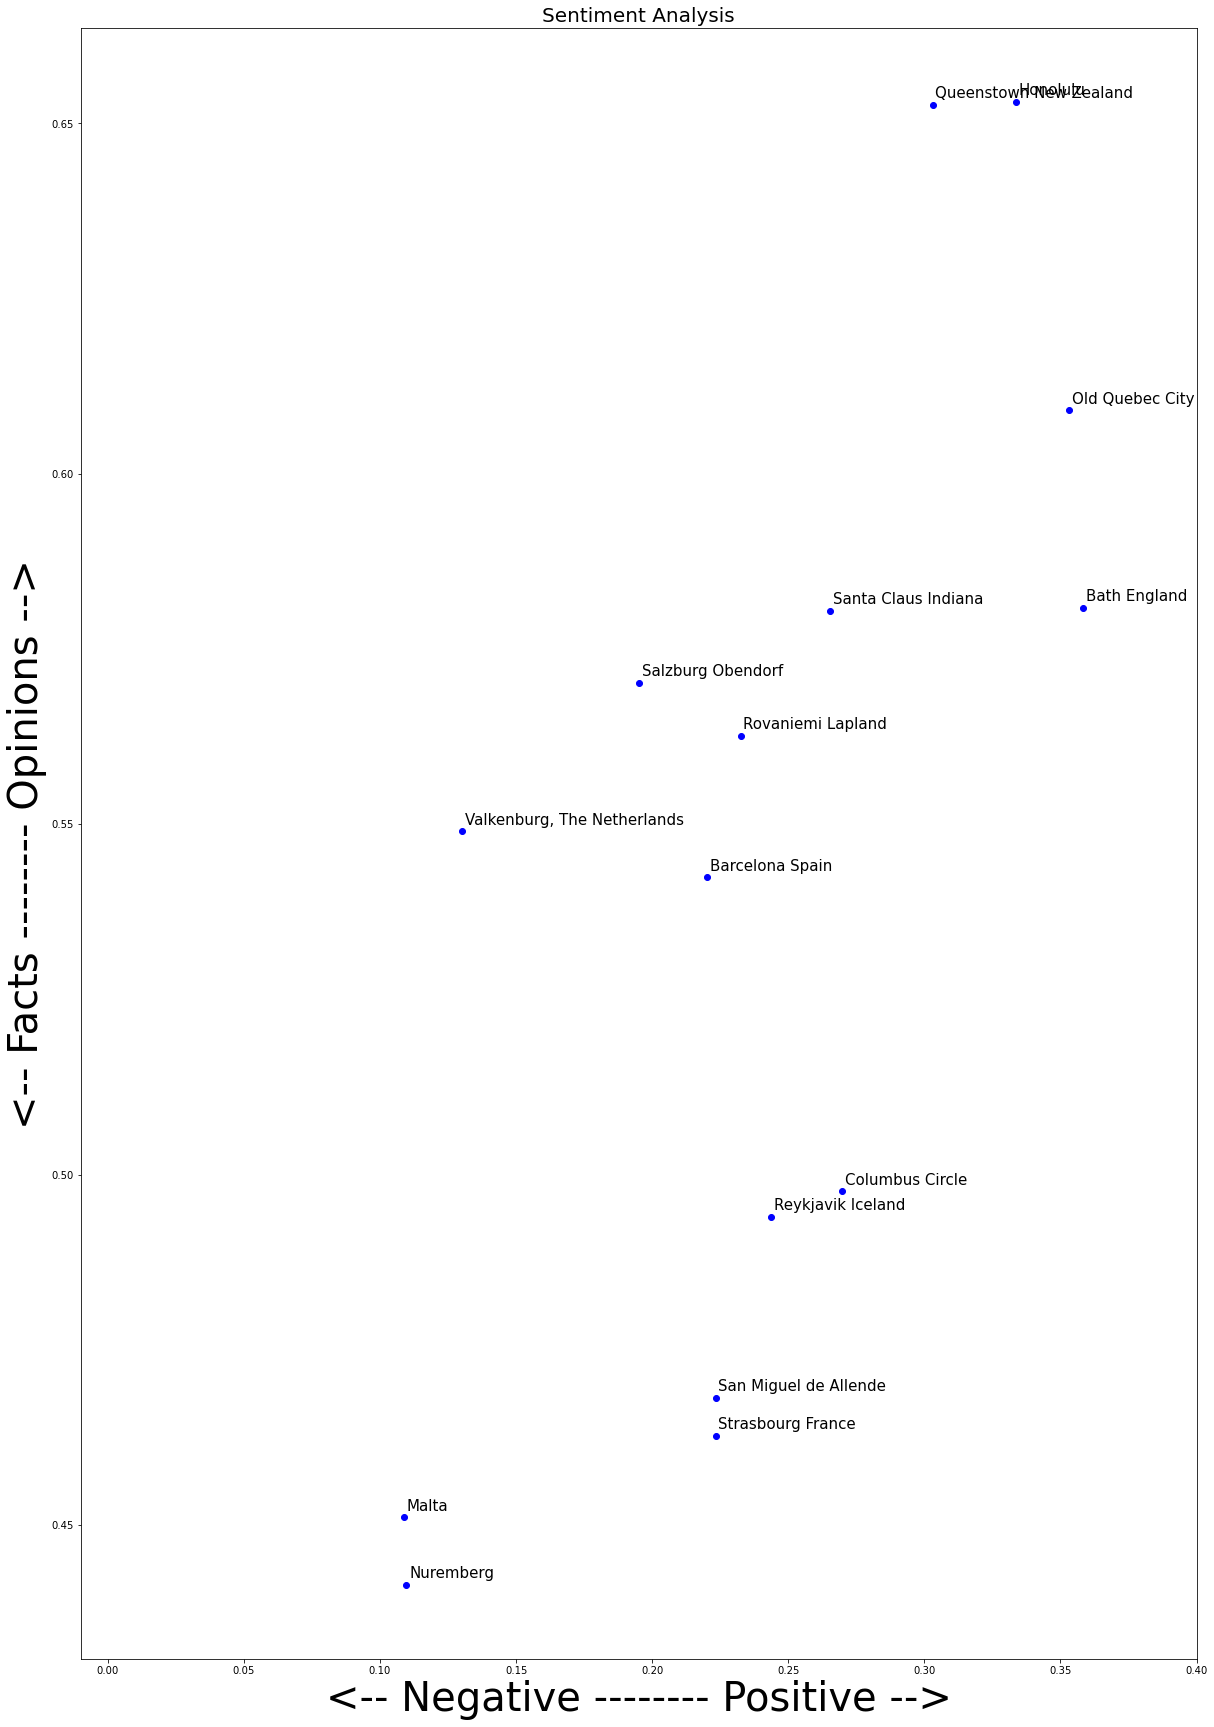

In [334]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 30]

for index, places in enumerate(data.index):
    x = data.polarity.loc[places]
    y = data.subjectivity.loc[places]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['place'][index], fontsize=15)
    plt.xlim(-.01, .40) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=40)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=40)

plt.show()

'Bath England' had a more Positive Sentiment Analysis than the others 

In [335]:

# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [336]:
# Let's take a look at our data again
data

,Reviews,place,polarity,subjectivity
Barcelona Spain,"\n\nWe were in Barcelona in Sept. 2007 & I must say it was the best European trip I have ever been on. We stayed for 5 days, there were lots to se...",Barcelona Spain,0.220189,0.542392
Bath England,\n\nLast August I visited the city of Bath in Somerset. This city is situated on the banks of the beautiful River Avon with its lovely step-like w...,Bath England,0.358447,0.580836
Columbus Circle,"Your friendly neighborhood liquor store. Excellent service, wide selection and reasonable prices to boot. We were staying near this area and walke...",Columbus Circle,0.269708,0.497597
Honolulu,"Christmas in Honolulu, WOW. I live in Indiana and at Christmas time it is always cold. See the trees and exhibits in sunny Hawaii was great. Th...",Honolulu,0.333719,0.653026
Malta,"\n\nUnfortunately, Malta really has let itself down as a holiday destination. The top rated hotels are fine. The problems begin when you leave the...",Malta,0.108860,0.451064
Nuremberg,"\n\nNürnberg is my second most-favorite city. It is very close to my favorite city, Edinburgh, Scotland, but that is merely familial, both sides b...",Nuremberg,0.109673,0.441475
Old Quebec City,Lovely and quaint with beautiful shops and restaurants. It is sophisticated and charming. The castle in background adds to the charm. Don’t miss ...,Old Quebec City,0.353212,0.609028
Queenstown New Zealand,The lake and the surrounding area is just stunning. It is definitely worth stopping at a few different locations around the lake to take in the vi...,Queenstown New Zealand,0.302991,0.652626
Reykjavik Iceland,"\n\nReykjavik, Iceland is a real special place to visit. Not only for the absolutely beautiful people, but for reindeer and whale meat too.I was t...",Reykjavik Iceland,0.243763,0.493942
Rovaniemi Lapland,"Hotel-standard cottage accommodation at the Arctic Circle, heart of Santa Claus Village. Our cabins are all equipped with up-to-date facilities, s...",Rovaniemi Lapland,0.232470,0.562634


In [337]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.Reviews:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["\n\nWe were in Barcelona in Sept. 2007 & I must say it was the best European trip I have ever been on. We stayed for 5 days, there were lots to see & do , including magnificent seafood restaurants, a nice beach, the 'Poble Espagnol' (old Spanish village) really opened my eyes to the past......Totally unique experience was going to the Marmagnum shopping centre ( pricey shops though ) - you had to cross a moving bridge to get to it. We also will never forget the fun cable cars up to the castle , the views from them were breathtaking.......We had the chance to visit Sitges ( an old town ) for a day ",
  'trip - it had a beautiful beach , with a lovely promenade......such a romantic place!!The Las Ramblas street was obviously popular with tourists for the number of postcards stands along it ,; the fresh fruit market had really healthy looking fruit - the tomatoes were like something out of a painting , they were that ripe & fresh. All in all , a score of 10 out of 10. I loved it!\n\n \

In [338]:
# Calculate the polarity for each piece of text

polarity_review = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_review.append(polarity_piece)
    
polarity_review

[[0.3340909090909091,
  0.4173076923076922,
  0.30393939393939395,
  0.23243641774891777,
  0.15555555555555556,
  0.29333333333333333,
  0.31359126984126984,
  0.27053571428571427,
  -0.05791666666666669,
  0.030208333333333354],
 [0.39,
  0.45,
  0.5950446428571429,
  0.36759259259259264,
  0.22053571428571425,
  0.19285714285714287,
  0.3797142857142857,
  0.23452380952380952,
  0.31243386243386245,
  0.38095238095238104],
 [0.36874999999999997,
  0.19999999999999998,
  0.4,
  0.10214285714285715,
  0.0,
  0.0,
  0.8,
  0.3,
  0.32499999999999996,
  0.11666666666666665],
 [-0.12121212121212122,
  0.65,
  0.7666666666666666,
  0.18148148148148147,
  0.016666666666666663,
  0.5499999999999999,
  0.55,
  -0.125,
  0.253125,
  0.4714285714285715],
 [0.08833077316948285,
  0.03516798418972331,
  -0.013664596273291928,
  0.07043650793650795,
  0.11764705882352941,
  0.2010681818181818,
  0.16041666666666665,
  0.13032774838330394,
  0.07162698412698414,
  0.19632478632478634],
 [0.1571428

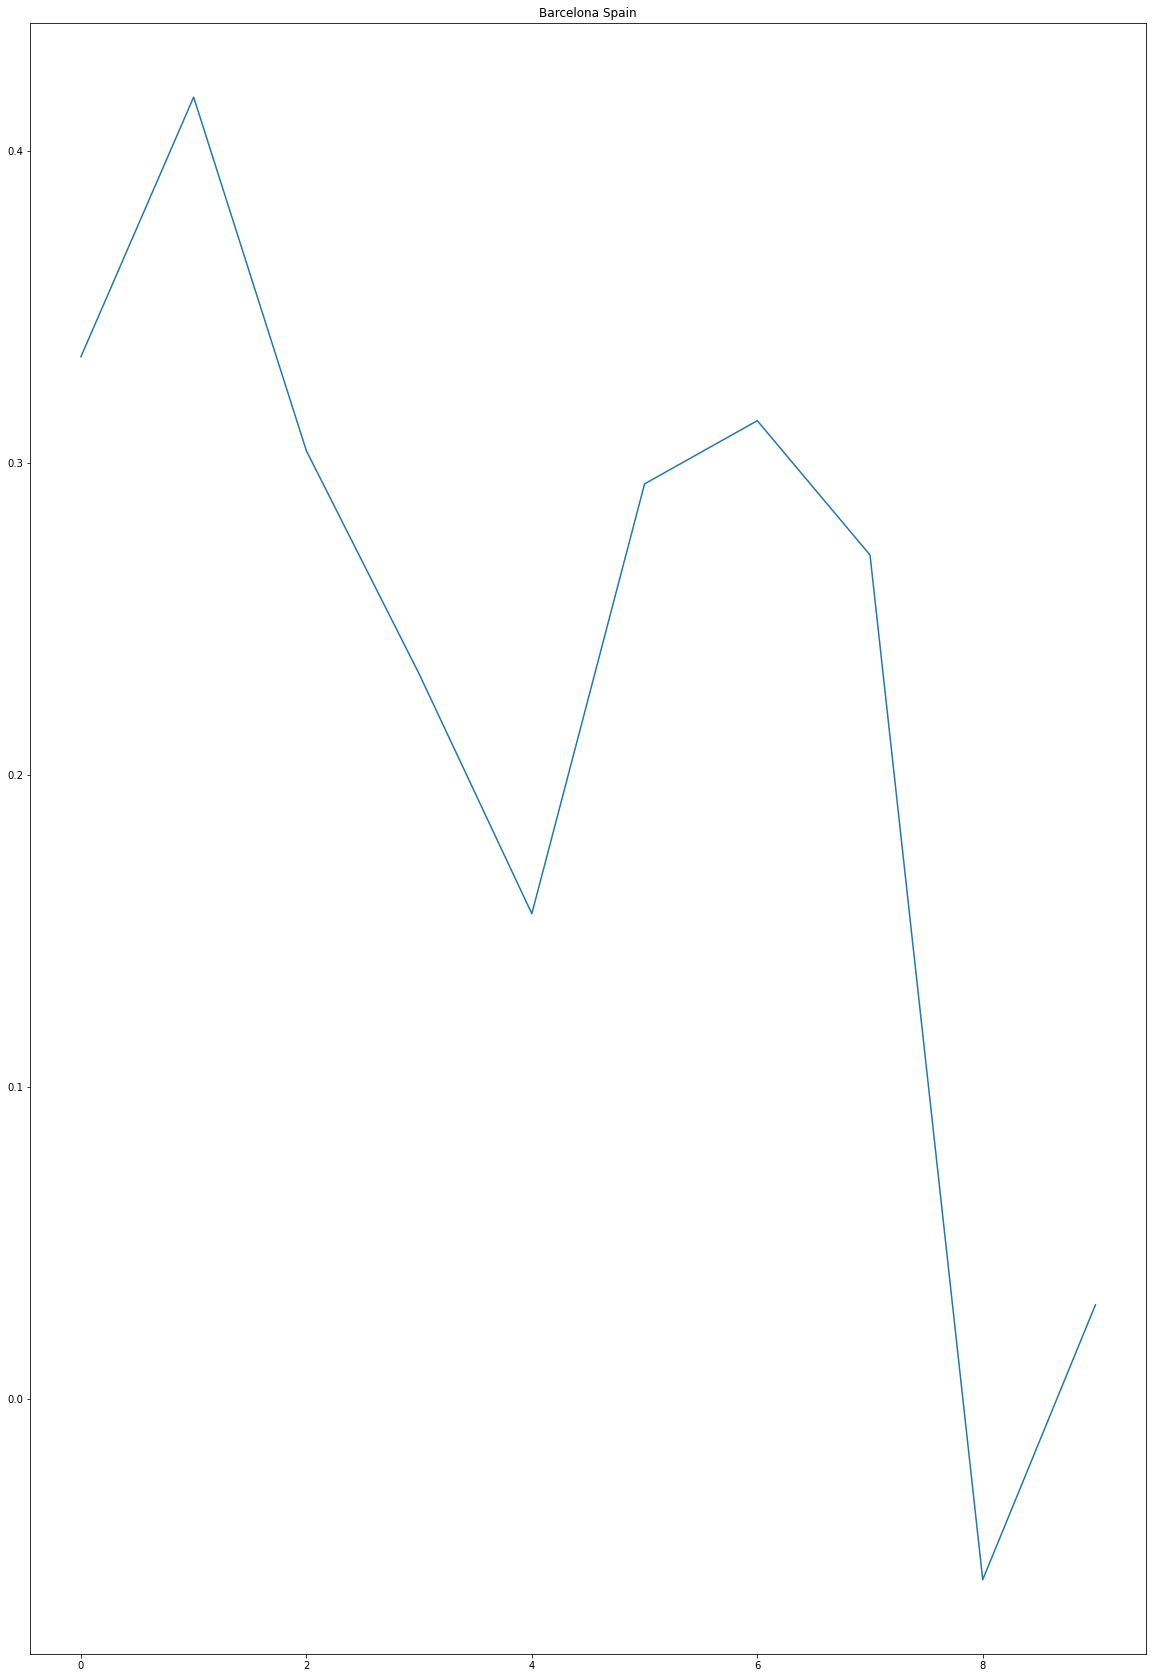

In [339]:
# Show the plot for one review
plt.plot(polarity_review[0])
plt.title(data['place'].index[0])
plt.show()

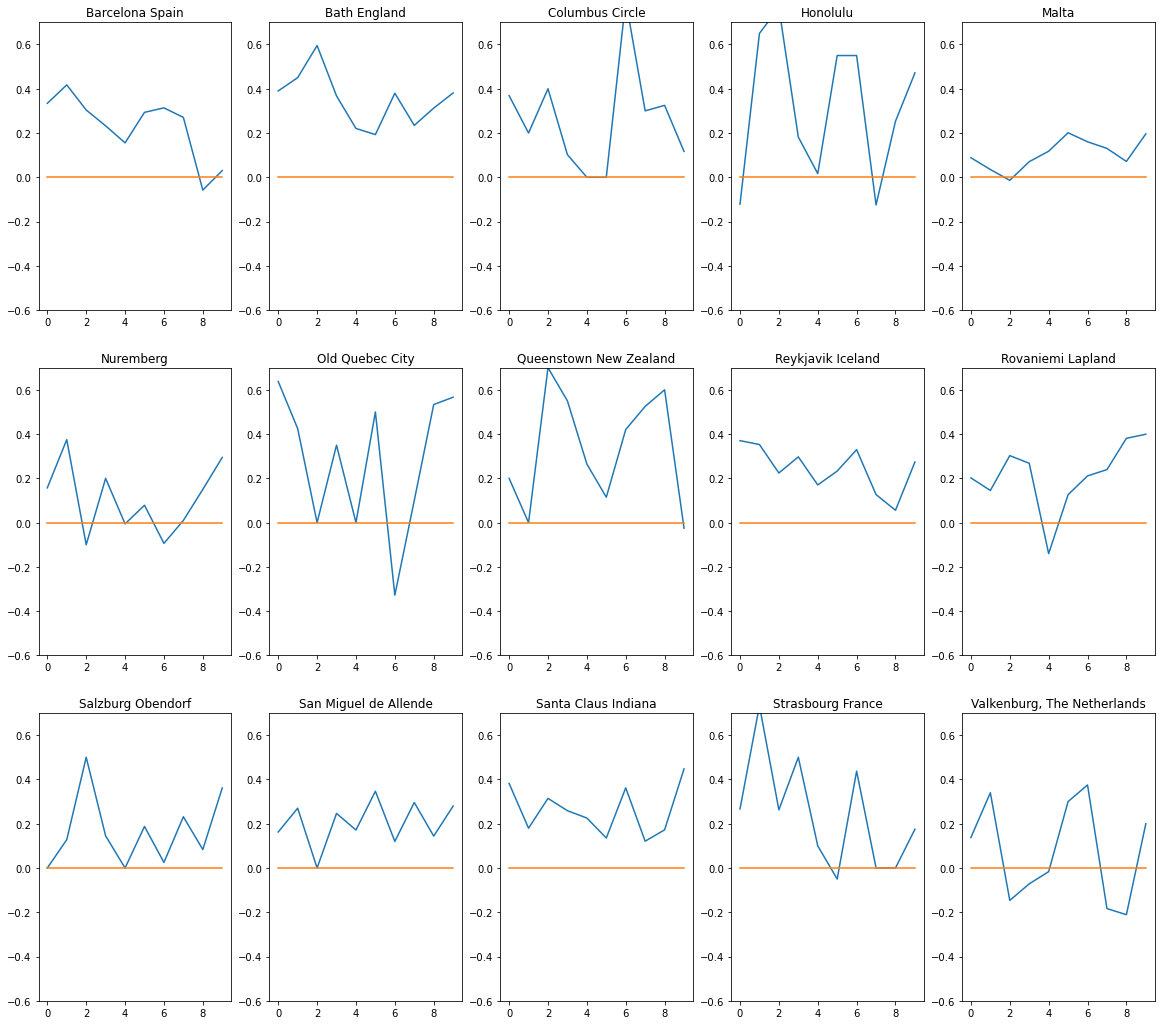

In [340]:
# Show the plot for all place
plt.rcParams['figure.figsize'] = [20,18]

for index, place in enumerate(data.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_review[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['place'][index])
    plt.ylim(ymin=-.6, ymax=.7)
    
plt.show()

In [341]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle
from urllib.request import urlopen
# Scrapes transcript data from songlyrics.com
def url_to_transcript1(url):
    page1 = requests.get(url).text
    soup1 = BeautifulSoup(page1, "lxml")
    text1 = [p.text for p in soup1.find_all(True,{'class':["c-review__body","comment-entry","accordion","x-ve9onj","review__text","content","review-card__description","lemon--span__373c0__3997G raw__373c0__3rcx7","row weather-columns","ng-binding"]})]
    print(url)
    return text1

# URLs of transcripts in scope
urls1 = [
        'https://www.holidaysplease.co.uk/holidays/malta-holidays/malta/reviews/',
        'https://www.holidaysplease.co.uk/holidays/usa-holidays/new-york/reviews/',
        'https://www.booking.com/hotel/gb/the-gainsborough-bath-spa-bath.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=261142;dest_type=landmark;dist=0;group_adults=2;group_children=0;hapos=4;hpos=4;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1606012392;srpvid=791311f4c2cd007c;type=total;ucfs=1&#tab-reviews',
        'https://www.booking.com/hotel/es/w-barcelona.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=-372490;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1606012213;srpvid=76a4119a35a200f1;type=total;ucfs=1&#tab-reviews',
        'https://www.getyourguide.com/activity/rovaniemi-l2653/ranua-half-day-northernmost-zoo-in-the-world-tour-t150098?utm_force=0',
        'https://www.minube.net/place/mercado-de-navidad--a2195347',
        'https://www.booking.com/hotel/us/hyatt-regency-waikiki-beach-resort-spa.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=20030916;dest_type=city;dist=0;from_beach_non_key_ufi_sr=1;group_adults=2;group_children=0;hapos=10;hpos=10;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1606010935;srpvid=96840f1b20380042;type=total;ucfs=1&#tab-reviews',
        'https://www.booking.com/hotel/ca/les-lofts-st-pierre.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=1595;dest_type=district;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1606012468;srpvid=e19c121af6640050;type=total;ucfs=1&#tab-reviews',
        'https://guidetoiceland.is/book-holiday-trips/jokulsarlon-lagoon-and-ice-caving-three-day-tour',
        'https://www.getyourguide.com/activity/san-miguel-de-allende-l2515/san-miguel-landmarks-and-lunch-walking-tour-t257557?utm_force=0',
        'https://www.getyourguide.com/activity/salzburg-l4/oberndorf-chapel-tour-silent-night-holy-night-christmas-eve-t891?utm_force=0',
        'https://www.booking.com/hotel/us/peppermint-house-santa-claus.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=20039124;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1606013586;srpvid=9c071449362c0081;type=total;ucfs=1&#tab-reviews',
        'https://www.booking.com/hotel/fr/golden-tulip-strasbourg-centre-the-garden.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=-1471697;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1606014011;srpvid=0419151d8d010066;type=total;ucfs=1&#tab-reviews',
        'https://www.thriftytours.co.nz/reviews',
        'https://getsetandgo.wordpress.com/2019/12/21/a-visit-to-a-christmas-market-in-a-cave-in-valkenburg-netherlands/'
       ]

# singers names
places1 = ['Malta','Columbus Circle','Bath England','Barcelona Spain','Rovaniemi Lapland','Nuremberg','Honolulu', 'Old Quebec City','Reykjavik Iceland','San Miguel de Allende','Salzburg Obendorf','Santa Claus Indiana','Strasbourg France','Queenstown New Zealand','Valkenburg The Netherlands' ]

In [343]:
 # Actually request transcripts (takes a few minutes to run)
transcripts1 = [url_to_transcript1(u) for u in urls1]

https://www.holidaysplease.co.uk/holidays/malta-holidays/malta/reviews/
https://www.holidaysplease.co.uk/holidays/usa-holidays/new-york/reviews/
https://www.booking.com/hotel/gb/the-gainsborough-bath-spa-bath.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=261142;dest_type=landmark;dist=0;group_adults=2;group_children=0;hapos=4;hpos=4;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1606012392;srpvid=791311f4c2cd007c;type=total;ucfs=1&#tab-reviews
https://www.booking.com/hotel/es/w-barcelona.en-us.html?aid=1784897;label=affnetawin-index_pub-101248_site-at107372_a127447_m14_p89938_t74641_cPH_f543415_pname-adgoal%20GmbH%20-%20Content_plc-_ts-_clkid-18119_1606009632_f5fd13899ad46e4c37dd498870bf55f3;sid=99d9d567f77ba26a59f658425bed167a;dest_id=-372490;dest_type=city;

In [344]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts1

for i, c in enumerate(places1):
     with open("transcripts1/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts1[i], file)

A subdirectory or file transcripts1 already exists.


In [345]:
# Load pickled files
data1 = {}
for i, c in enumerate(places1):
    with open("transcripts1/" + c + ".txt", "rb") as file:
        data1[c] = pickle.load(file)

In [346]:
data1.keys()

dict_keys(['Malta', 'Columbus Circle', 'Bath England', 'Barcelona Spain', 'Rovaniemi Lapland', 'Nuremberg', 'Honolulu', 'Old Quebec City', 'Reykjavik Iceland', 'San Miguel de Allende', 'Salzburg Obendorf', 'Santa Claus Indiana', 'Strasbourg France', 'Queenstown New Zealand', 'Valkenburg The Netherlands'])

In [347]:
data1['Valkenburg The Netherlands'][:4]

['\nCool. Never heard of this city. \nLikeLike\n\nReply \n',
 '\nyah.. Neither had I but its very popular with locals as a tourist destination..\nLikeLike\n\nReply \n',
 '\nGreat. \nLikeLike\n\n\n',
 '\nwhat a fascinating place! Thanks for sharing your trip with us.\nLikeLike\n\nReply \n']

In [348]:
def combine_text1(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text1 = ' '.join(list_of_text)
    return combined_text1

In [349]:
data_combined1 = {key: [combine_text1(value)] for (key, value) in data1.items()}

In [350]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150) 

data_df1 = pd.DataFrame.from_dict(data_combined1).transpose()
data_df1.columns = ['Reviews']
data_df1 = data_df1.sort_index()
data_df1

,Reviews
Barcelona Spain,"“The hotel Accomodation department/session was lovely ” “It was great to be near the beach, but it is from from many attractions in the city.” “Th..."
Bath England,“Fabulous hotel in a superb location in the centre of Bath. The staff were excellent and the complimentary access to the spa village bath was a lo...
Columbus Circle,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tLisa C\n“Nice”\n\n\n\n\nRating 9/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tChristina P\n“NY was very crowded. Ho...
Honolulu,"“Great location, very safe area and great hotel. Friendly staff and very clean facilities/room. COVID-19 measures in place and enforced.” “Awesome..."
Malta,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tFrank M\n“BUSES WERE GOOD \r\nTAXI TO BLUE GROTTO\r\nVERY SAFE\r\n”\n\n\n\n\nRating 8/10 -\n\t\t\t\t...
Nuremberg,\n\n\nNuremberg Christmas Market\n\n\n\n4.8/5 (6 reviews)\n \nThings to see\nThings to do in Germany\nThings to do in Bavaria\nThings to do in Nur...
Old Quebec City,“Excellent location and great spacious loft with modern amenities. Walking distance to everything. ” “Clean. Well equipped. Excellent location. P...
Queenstown New Zealand,"\nThank you for your excellent arrangements. It made my solo travel so much easier. \r\nThe train journey was awesome, and the shuttles were super..."
Reykjavik Iceland,"Start your adventure with a 3-day trip to Iceland. Explore the famous sites of the Golden Circle and South Coast, as well as Jökulsárlón Glacier L..."
Rovaniemi Lapland,Alex is very helpful! I recommend. Alex is an excellent guide and companion We are old couple very well liked after He even volunteered to drop u...


In [351]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1a(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1a = lambda x: clean_text_round1a(x)

In [352]:
# Let's take a look at the updated text
data_clean1 = pd.DataFrame(data_df1.Reviews.apply(round1a))
data_clean1

,Reviews
Barcelona Spain,“the hotel accomodation departmentsession was lovely ” “it was great to be near the beach but it is from from many attractions in the city” “the b...
Bath England,“fabulous hotel in a superb location in the centre of bath the staff were excellent and the complimentary access to the spa village bath was a lov...
Columbus Circle,\n\n\nrating \n\t\t\t\t\t\t\t\t\t\t\t\tlisa c\n“nice”\n\n\n\n\nrating \n\t\t\t\t\t\t\t\t\t\t\t\tchristina p\n“ny was very crowded hotel redbury ...
Honolulu,“great location very safe area and great hotel friendly staff and very clean facilitiesroom measures in place and enforced” “awesome location bea...
Malta,\n\n\nrating \n\t\t\t\t\t\t\t\t\t\t\t\tfrank m\n“buses were good \r\ntaxi to blue grotto\r\nvery safe\r\n”\n\n\n\n\nrating \n\t\t\t\t\t\t\t\t\t\...
Nuremberg,\n\n\nnuremberg christmas market\n\n\n\n reviews\n \nthings to see\nthings to do in germany\nthings to do in bavaria\nthings to do in nurembergnu...
Old Quebec City,“excellent location and great spacious loft with modern amenities walking distance to everything ” “clean well equipped excellent location perfec...
Queenstown New Zealand,\nthank you for your excellent arrangements it made my solo travel so much easier \r\nthe train journey was awesome and the shuttles were super o...
Reykjavik Iceland,start your adventure with a trip to iceland explore the famous sites of the golden circle and south coast as well as jökulsárlón glacier lagoon t...
Rovaniemi Lapland,alex is very helpful i recommend alex is an excellent guide and companion we are old couple very well liked after he even volunteered to drop us ...


In [353]:
# Apply a second round of cleaning
def clean_text_round2a(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n','', text)
    text = re.sub('\t','', text)
    text = re.sub('\r','', text)
    return text

round2a = lambda x: clean_text_round2a(x)

In [354]:
# Let's take a look at the updated text
data_clean1 = pd.DataFrame(data_clean1.Reviews.apply(round2a))
data_clean1

,Reviews
Barcelona Spain,the hotel accomodation departmentsession was lovely it was great to be near the beach but it is from from many attractions in the city the best p...
Bath England,fabulous hotel in a superb location in the centre of bath the staff were excellent and the complimentary access to the spa village bath was a love...
Columbus Circle,rating lisa cnicerating christina pny was very crowded hotel redbury was in manhattan and easy to commute from there rating shelley jny phoenix...
Honolulu,great location very safe area and great hotel friendly staff and very clean facilitiesroom measures in place and enforced awesome location beauti...
Malta,rating frank mbuses were good taxi to blue grottovery saferating paul wit was actually gozo very quiet and different to maltarating marisa rbea...
Nuremberg,nuremberg christmas market reviews things to seethings to do in germanythings to do in bavariathings to do in nurembergnuremberg christmas market...
Old Quebec City,excellent location and great spacious loft with modern amenities walking distance to everything clean well equipped excellent location perfect o...
Queenstown New Zealand,thank you for your excellent arrangements it made my solo travel so much easier the train journey was awesome and the shuttles were super on time...
Reykjavik Iceland,start your adventure with a trip to iceland explore the famous sites of the golden circle and south coast as well as jökulsárlón glacier lagoon t...
Rovaniemi Lapland,alex is very helpful i recommend alex is an excellent guide and companion we are old couple very well liked after he even volunteered to drop us ...


In [355]:
# Let's add the place as well
place1 = ['Barcelona Spain','Bath England','Columbus Circle','Honolulu','Malta','Nuremberg','Old Quebec City', 'Queenstown New Zealand','Reykjavik Iceland','Rovaniemi Lapland','Salzburg Obendorf','San Miguel de Allende','Santa Claus Indiana','Strasbourg France','Valkenburg, The Netherlands' ]

data_df1['place1'] = place1
data_df1

,Reviews,place1
Barcelona Spain,"“The hotel Accomodation department/session was lovely ” “It was great to be near the beach, but it is from from many attractions in the city.” “Th...",Barcelona Spain
Bath England,“Fabulous hotel in a superb location in the centre of Bath. The staff were excellent and the complimentary access to the spa village bath was a lo...,Bath England
Columbus Circle,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tLisa C\n“Nice”\n\n\n\n\nRating 9/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tChristina P\n“NY was very crowded. Ho...,Columbus Circle
Honolulu,"“Great location, very safe area and great hotel. Friendly staff and very clean facilities/room. COVID-19 measures in place and enforced.” “Awesome...",Honolulu
Malta,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tFrank M\n“BUSES WERE GOOD \r\nTAXI TO BLUE GROTTO\r\nVERY SAFE\r\n”\n\n\n\n\nRating 8/10 -\n\t\t\t\t...,Malta
Nuremberg,\n\n\nNuremberg Christmas Market\n\n\n\n4.8/5 (6 reviews)\n \nThings to see\nThings to do in Germany\nThings to do in Bavaria\nThings to do in Nur...,Nuremberg
Old Quebec City,“Excellent location and great spacious loft with modern amenities. Walking distance to everything. ” “Clean. Well equipped. Excellent location. P...,Old Quebec City
Queenstown New Zealand,"\nThank you for your excellent arrangements. It made my solo travel so much easier. \r\nThe train journey was awesome, and the shuttles were super...",Queenstown New Zealand
Reykjavik Iceland,"Start your adventure with a 3-day trip to Iceland. Explore the famous sites of the Golden Circle and South Coast, as well as Jökulsárlón Glacier L...",Reykjavik Iceland
Rovaniemi Lapland,Alex is very helpful! I recommend. Alex is an excellent guide and companion We are old couple very well liked after He even volunteered to drop u...,Rovaniemi Lapland


In [356]:
# Let's pickle it for later use
data_df1.to_pickle("corpus1.pkl")

In [357]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')
data_cv1 = cv1.fit_transform(data_clean1.Reviews)
data_dtm1 = pd.DataFrame(data_cv1.toarray(), columns=cv1.get_feature_names())
data_dtm1.index = data_clean1.index
data_dtm1

,abbey,abby,abbyread,abbys,abig,able,absolute,absolutely,absorb,abysmal,...,york,yorkrating,yorktaxi,youd,young,yummy,zealand,zealandcannot,zealandwarmest,zurich
Barcelona Spain,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Bath England,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Columbus Circle,0,0,0,0,1,0,0,1,0,0,...,19,1,1,0,0,0,0,0,0,0
Honolulu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nuremberg,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Old Quebec City,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Queenstown New Zealand,0,5,1,2,0,12,1,11,1,1,...,0,0,0,1,3,1,59,1,1,1
Reykjavik Iceland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rovaniemi Lapland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [358]:
# Let's pickle it for later use
data_dtm1.to_pickle("dtm1.pkl")

In [359]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean1.to_pickle('data_clean1.pkl')
pickle.dump(cv1, open("cv1.pkl", "wb"))

In [360]:
# Read in the document-term matrix
import pandas as pd

data1 = pd.read_pickle('dtm1.pkl')
data1 = data1.transpose()
data1.head()

,Barcelona Spain,Bath England,Columbus Circle,Honolulu,Malta,Nuremberg,Old Quebec City,Queenstown New Zealand,Reykjavik Iceland,Rovaniemi Lapland,Salzburg Obendorf,San Miguel de Allende,Santa Claus Indiana,Strasbourg France,Valkenburg The Netherlands
abbey,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
abby,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0
abbyread,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
abbys,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
abig,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [361]:
# Find the top 30 words in each review
top_dict1 = {}
for c in data1.columns:
    top1 = data1[c].sort_values(ascending=False).head(30)
    top_dict1[c]= list(zip(top1.index, top1.values))

top_dict1

{'Barcelona Spain': [('great', 5),
  ('location', 5),
  ('staff', 5),
  ('room', 3),
  ('city', 3),
  ('barcelona', 2),
  ('friendly', 2),
  ('stay', 2),
  ('place', 2),
  ('nice', 2),
  ('beautiful', 2),
  ('easy', 2),
  ('bar', 2),
  ('beach', 2),
  ('views', 2),
  ('walk', 2),
  ('walked', 2),
  ('view', 2),
  ('highly', 1),
  ('locations', 1),
  ('minutes', 1),
  ('minute', 1),
  ('bottles', 1),
  ('water', 1),
  ('attractions', 1),
  ('sky', 1),
  ('normal', 1),
  ('begin', 1),
  ('greeted', 1),
  ('soon', 1)],
 'Bath England': [('spa', 11),
  ('staff', 6),
  ('hotel', 6),
  ('room', 6),
  ('bath', 4),
  ('access', 3),
  ('comfortable', 3),
  ('service', 3),
  ('centre', 2),
  ('facilities', 2),
  ('guest', 2),
  ('beautiful', 2),
  ('thermal', 2),
  ('welcome', 2),
  ('thermae', 2),
  ('bathtub', 2),
  ('bed', 2),
  ('helpful', 2),
  ('bathhouse', 2),
  ('shops', 2),
  ('village', 2),
  ('location', 2),
  ('complimentary', 2),
  ('spacious', 1),
  ('station', 1),
  ('short', 1),


In [362]:
for places, top_words in top_dict1.items():
    print(places)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Barcelona Spain
great, location, staff, room, city, barcelona, friendly, stay, place, nice, beautiful, easy, bar, beach
---
Bath England
spa, staff, hotel, room, bath, access, comfortable, service, centre, facilities, guest, beautiful, thermal, welcome
---
Columbus Circle
york, new, rating, great, city, place, love, loved, itrating, visited, people, time, cityrating, visit
---
Honolulu
room, view, great, location, hotel, convenient, amazing, beach, super, waikiki, stay, really, service, breakfast
---
Malta
rating, friendly, island, people, malta, place, hi, visited, took, easy, history, friends, taxi, wanted
---
Nuremberg
christmas, nuremberg, market, like, original, wine, low, near, europe, best, served, decorated, medieval, markets
---
Old Quebec City
clean, place, location, excellent, great, spacious, looks, feels, coming, new, booked, space, furniture, modern
---
Queenstown New Zealand
tour, trip, great, time, new, tours, thank, zealand, thrifty, thanks, good, bus, wonderful, day
-

In [363]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each review
words1 = []
for places in data1.columns:
    top = [word for (word, count) in top_dict1[places]]
    for t in top:
        words1.append(t)
        
words1

['great',
 'location',
 'staff',
 'room',
 'city',
 'barcelona',
 'friendly',
 'stay',
 'place',
 'nice',
 'beautiful',
 'easy',
 'bar',
 'beach',
 'views',
 'walk',
 'walked',
 'view',
 'highly',
 'locations',
 'minutes',
 'minute',
 'bottles',
 'water',
 'attractions',
 'sky',
 'normal',
 'begin',
 'greeted',
 'soon',
 'spa',
 'staff',
 'hotel',
 'room',
 'bath',
 'access',
 'comfortable',
 'service',
 'centre',
 'facilities',
 'guest',
 'beautiful',
 'thermal',
 'welcome',
 'thermae',
 'bathtub',
 'bed',
 'helpful',
 'bathhouse',
 'shops',
 'village',
 'location',
 'complimentary',
 'spacious',
 'station',
 'short',
 'star',
 'splurge',
 'class',
 'cleanliness',
 'york',
 'new',
 'rating',
 'great',
 'city',
 'place',
 'love',
 'loved',
 'itrating',
 'visited',
 'people',
 'time',
 'cityrating',
 'visit',
 'karen',
 'went',
 'ni',
 'amazing',
 'destination',
 'dorating',
 'debbie',
 'things',
 'lots',
 'amy',
 'sights',
 'busy',
 'good',
 'visitrating',
 'friendly',
 'just',
 'room'

In [364]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words1).most_common()

[('great', 8),
 ('friendly', 7),
 ('place', 7),
 ('location', 6),
 ('beautiful', 6),
 ('city', 5),
 ('nice', 5),
 ('good', 5),
 ('tour', 5),
 ('staff', 4),
 ('room', 4),
 ('helpful', 4),
 ('visit', 4),
 ('clean', 4),
 ('wonderful', 4),
 ('excellent', 4),
 ('easy', 3),
 ('hotel', 3),
 ('comfortable', 3),
 ('new', 3),
 ('people', 3),
 ('time', 3),
 ('amazing', 3),
 ('things', 3),
 ('really', 3),
 ('guide', 3),
 ('stay', 2),
 ('beach', 2),
 ('walk', 2),
 ('view', 2),
 ('highly', 2),
 ('service', 2),
 ('bed', 2),
 ('spacious', 2),
 ('cleanliness', 2),
 ('rating', 2),
 ('love', 2),
 ('loved', 2),
 ('visited', 2),
 ('went', 2),
 ('destination', 2),
 ('lots', 2),
 ('convenient', 2),
 ('breakfast', 2),
 ('awesome', 2),
 ('property', 2),
 ('happy', 2),
 ('island', 2),
 ('history', 2),
 ('travel', 2),
 ('times', 2),
 ('christmas', 2),
 ('market', 2),
 ('like', 2),
 ('looks', 2),
 ('space', 2),
 ('modern', 2),
 ('tours', 2),
 ('thank', 2),
 ('thanks', 2),
 ('bus', 2),
 ('day', 2),
 ('recommend', 

In [365]:
# If more than half of the review have it as a top word, exclude it from the list
add_stop_words1 = [word for word, count in Counter(words1).most_common() if count > 6]
add_stop_words1

['great', 'friendly', 'place']

In [366]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean1 = pd.read_pickle('data_clean1.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words1)

# Recreate document-term matrix
cv1 = CountVectorizer(stop_words=stop_words)
data_cv1 = cv1.fit_transform(data_clean1.Reviews)
data_stop1 = pd.DataFrame(data_cv1.toarray(), columns=cv1.get_feature_names())
data_stop1.index = data_clean1.index

# Pickle it for later use
import pickle
pickle.dump(cv1, open("cv_stop.pkl1", "wb"))
data_stop1.to_pickle("dtm_stop.pkl1")

In [367]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc1 = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

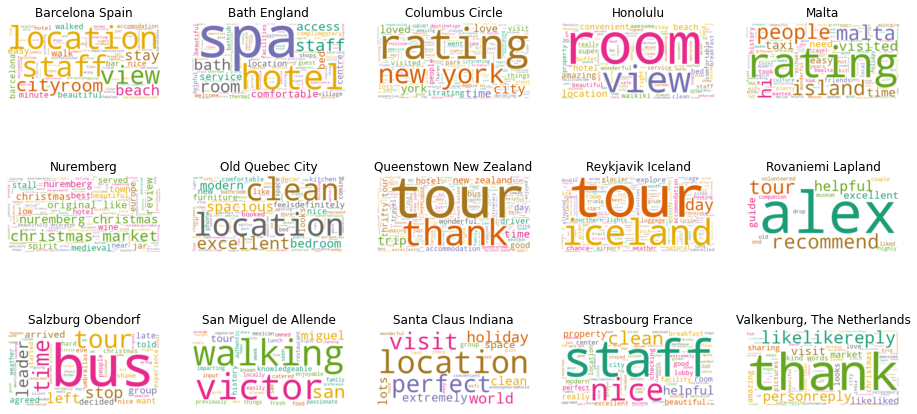

In [368]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]

place1 = ['Barcelona Spain','Bath England','Columbus Circle','Honolulu','Malta','Nuremberg','Old Quebec City', 'Queenstown New Zealand','Reykjavik Iceland','Rovaniemi Lapland','Salzburg Obendorf','San Miguel de Allende','Santa Claus Indiana','Strasbourg France','Valkenburg, The Netherlands' ]

# Create subplots for each review
for index, places in enumerate(data1.columns):
    wc1.generate(data_clean1.Reviews[places])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc1, interpolation="bilinear")
    plt.axis("off")
    plt.title(place1[index])
    
plt.show()

In [369]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data1 = pd.read_pickle('corpus1.pkl')
data1

,Reviews,place1
Barcelona Spain,"“The hotel Accomodation department/session was lovely ” “It was great to be near the beach, but it is from from many attractions in the city.” “Th...",Barcelona Spain
Bath England,“Fabulous hotel in a superb location in the centre of Bath. The staff were excellent and the complimentary access to the spa village bath was a lo...,Bath England
Columbus Circle,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tLisa C\n“Nice”\n\n\n\n\nRating 9/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tChristina P\n“NY was very crowded. Ho...,Columbus Circle
Honolulu,"“Great location, very safe area and great hotel. Friendly staff and very clean facilities/room. COVID-19 measures in place and enforced.” “Awesome...",Honolulu
Malta,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tFrank M\n“BUSES WERE GOOD \r\nTAXI TO BLUE GROTTO\r\nVERY SAFE\r\n”\n\n\n\n\nRating 8/10 -\n\t\t\t\t...,Malta
Nuremberg,\n\n\nNuremberg Christmas Market\n\n\n\n4.8/5 (6 reviews)\n \nThings to see\nThings to do in Germany\nThings to do in Bavaria\nThings to do in Nur...,Nuremberg
Old Quebec City,“Excellent location and great spacious loft with modern amenities. Walking distance to everything. ” “Clean. Well equipped. Excellent location. P...,Old Quebec City
Queenstown New Zealand,"\nThank you for your excellent arrangements. It made my solo travel so much easier. \r\nThe train journey was awesome, and the shuttles were super...",Queenstown New Zealand
Reykjavik Iceland,"Start your adventure with a 3-day trip to Iceland. Explore the famous sites of the Golden Circle and South Coast, as well as Jökulsárlón Glacier L...",Reykjavik Iceland
Rovaniemi Lapland,Alex is very helpful! I recommend. Alex is an excellent guide and companion We are old couple very well liked after He even volunteered to drop u...,Rovaniemi Lapland


In [370]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol1 = lambda x: TextBlob(x).sentiment.polarity
sub1 = lambda x: TextBlob(x).sentiment.subjectivity

data1['polarity'] = data1['Reviews'].apply(pol1)
data1['subjectivity'] = data1['Reviews'].apply(sub1)
data1

,Reviews,place1,polarity,subjectivity
Barcelona Spain,"“The hotel Accomodation department/session was lovely ” “It was great to be near the beach, but it is from from many attractions in the city.” “Th...",Barcelona Spain,0.454820,0.659730
Bath England,“Fabulous hotel in a superb location in the centre of Bath. The staff were excellent and the complimentary access to the spa village bath was a lo...,Bath England,0.449733,0.670800
Columbus Circle,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tLisa C\n“Nice”\n\n\n\n\nRating 9/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tChristina P\n“NY was very crowded. Ho...,Columbus Circle,0.332880,0.591787
Honolulu,"“Great location, very safe area and great hotel. Friendly staff and very clean facilities/room. COVID-19 measures in place and enforced.” “Awesome...",Honolulu,0.507477,0.668045
Malta,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tFrank M\n“BUSES WERE GOOD \r\nTAXI TO BLUE GROTTO\r\nVERY SAFE\r\n”\n\n\n\n\nRating 8/10 -\n\t\t\t\t...,Malta,0.371516,0.561428
Nuremberg,\n\n\nNuremberg Christmas Market\n\n\n\n4.8/5 (6 reviews)\n \nThings to see\nThings to do in Germany\nThings to do in Bavaria\nThings to do in Nur...,Nuremberg,0.361923,0.543462
Old Quebec City,“Excellent location and great spacious loft with modern amenities. Walking distance to everything. ” “Clean. Well equipped. Excellent location. P...,Old Quebec City,0.390353,0.670304
Queenstown New Zealand,"\nThank you for your excellent arrangements. It made my solo travel so much easier. \r\nThe train journey was awesome, and the shuttles were super...",Queenstown New Zealand,0.327617,0.562734
Reykjavik Iceland,"Start your adventure with a 3-day trip to Iceland. Explore the famous sites of the Golden Circle and South Coast, as well as Jökulsárlón Glacier L...",Reykjavik Iceland,0.194446,0.462008
Rovaniemi Lapland,Alex is very helpful! I recommend. Alex is an excellent guide and companion We are old couple very well liked after He even volunteered to drop u...,Rovaniemi Lapland,0.385000,0.523333


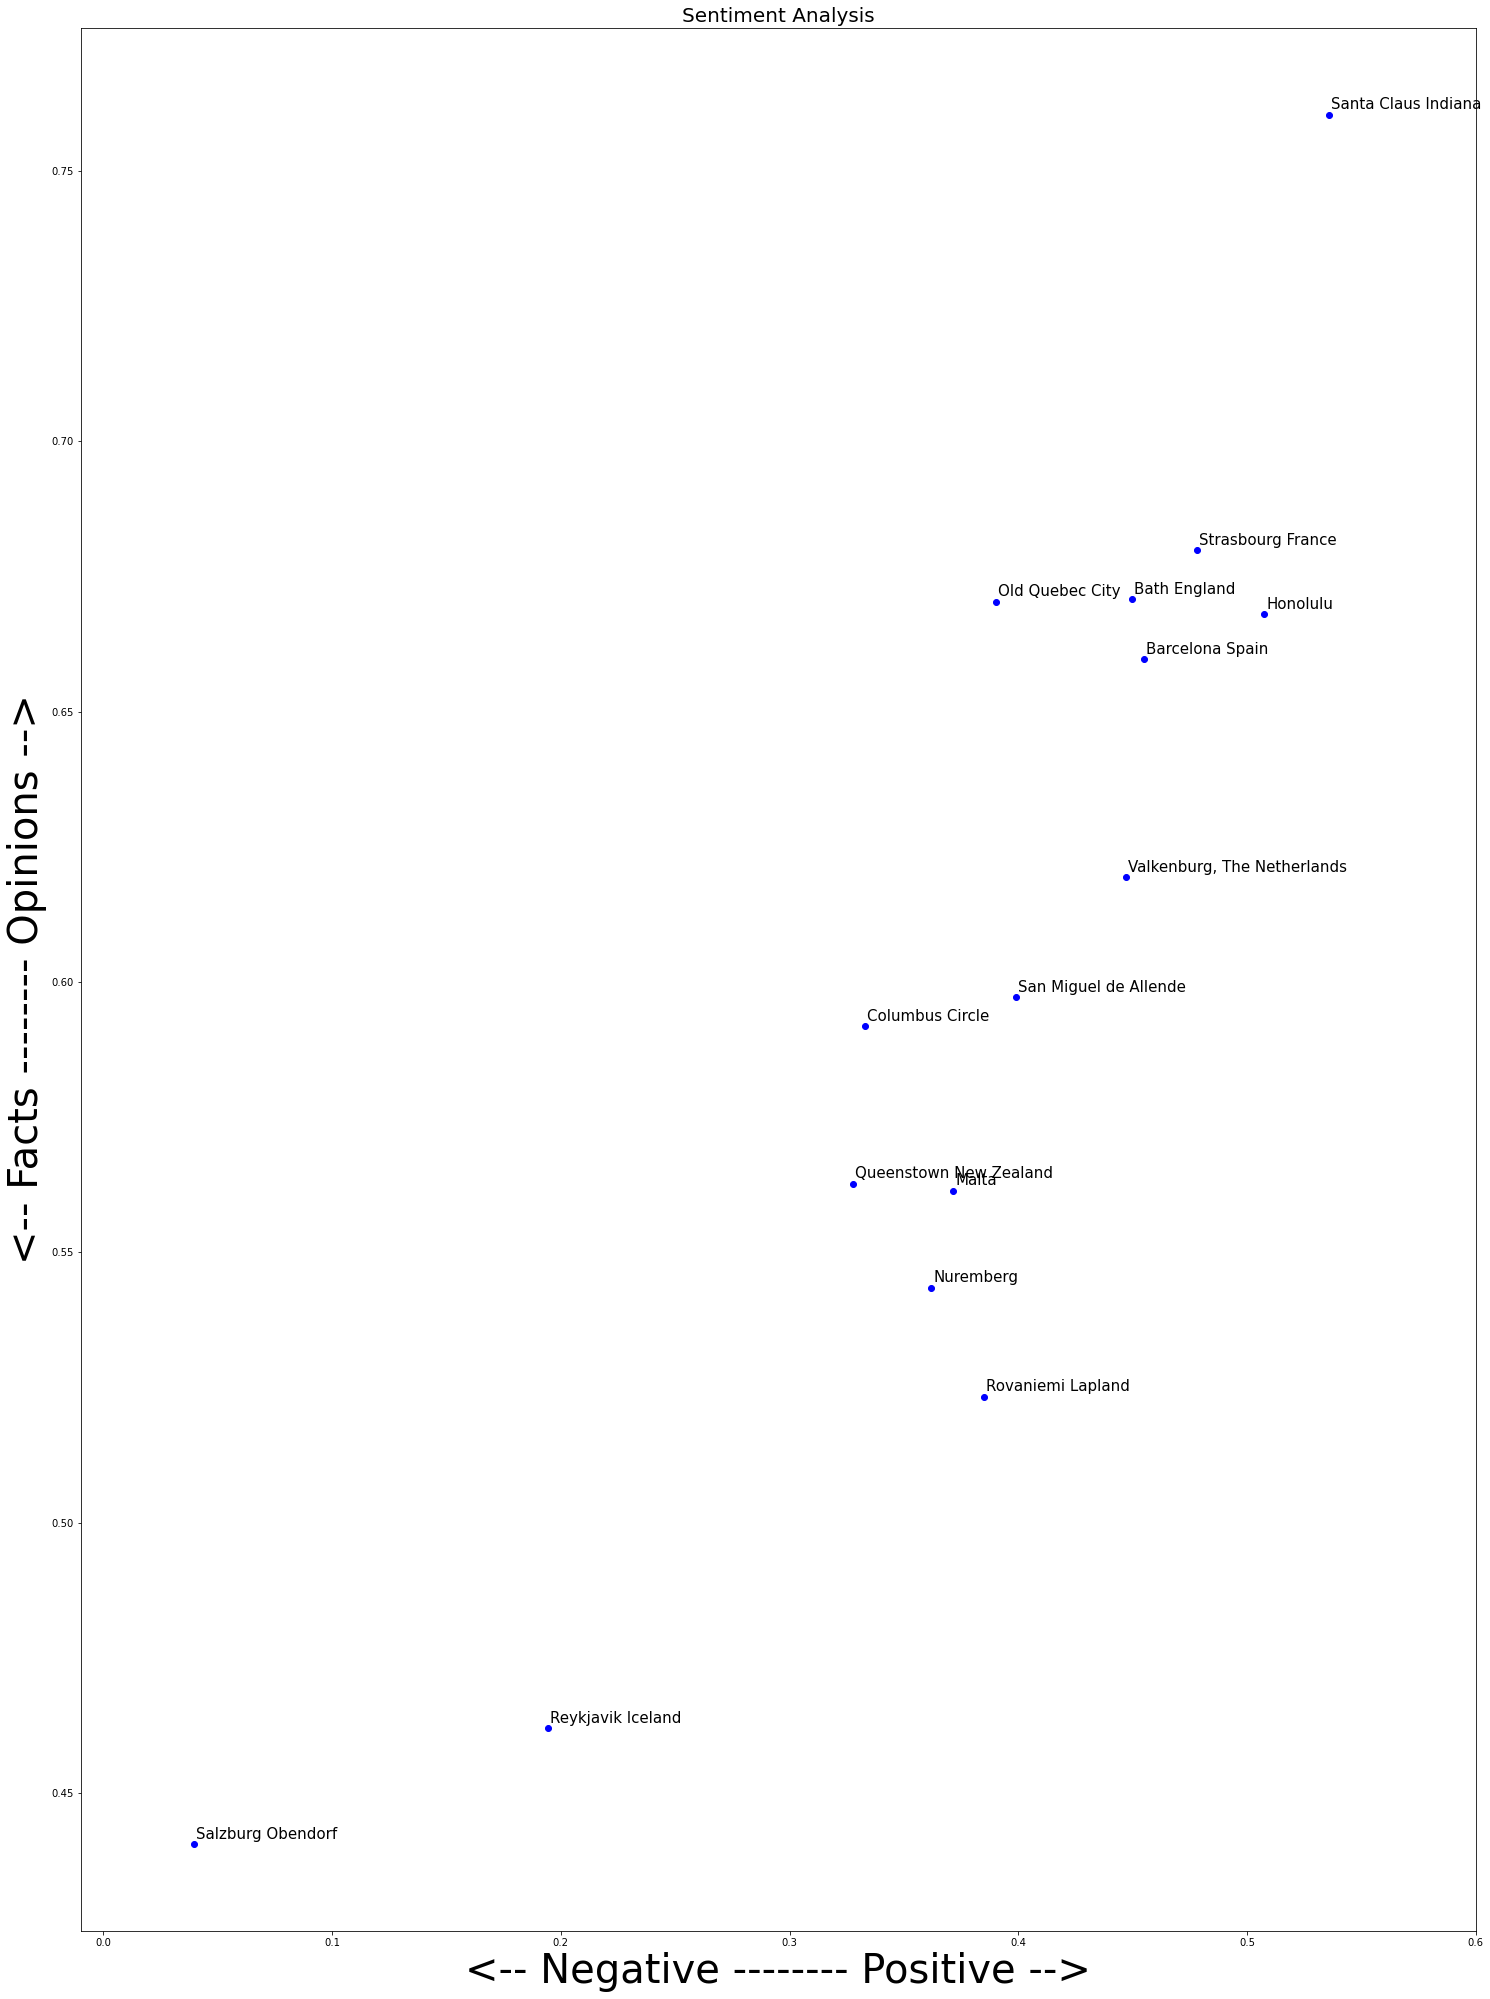

In [371]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25, 35]

for index, places in enumerate(data1.index):
    x = data1.polarity.loc[places]
    y = data1.subjectivity.loc[places]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data1['place1'][index], fontsize=15)
    plt.xlim(-.01,0.6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=40)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=40)

plt.show()

In [372]:

# Split each routine into 10 parts
import numpy as np
import math

def split_text1(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length1 = len(text)
    size1 = math.floor(length1 / n)
    start1 = np.arange(0, length1, size1)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list1 = []
    for piece in range(n):
        split_list1.append(text[start1[piece]:start1[piece]+size1])
    return split_list1

In [373]:
# Let's take a look at our data again
data1

,Reviews,place1,polarity,subjectivity
Barcelona Spain,"“The hotel Accomodation department/session was lovely ” “It was great to be near the beach, but it is from from many attractions in the city.” “Th...",Barcelona Spain,0.454820,0.659730
Bath England,“Fabulous hotel in a superb location in the centre of Bath. The staff were excellent and the complimentary access to the spa village bath was a lo...,Bath England,0.449733,0.670800
Columbus Circle,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tLisa C\n“Nice”\n\n\n\n\nRating 9/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tChristina P\n“NY was very crowded. Ho...,Columbus Circle,0.332880,0.591787
Honolulu,"“Great location, very safe area and great hotel. Friendly staff and very clean facilities/room. COVID-19 measures in place and enforced.” “Awesome...",Honolulu,0.507477,0.668045
Malta,\n\n\nRating 10/10 -\n\t\t\t\t\t\t\t\t\t\t\t\tFrank M\n“BUSES WERE GOOD \r\nTAXI TO BLUE GROTTO\r\nVERY SAFE\r\n”\n\n\n\n\nRating 8/10 -\n\t\t\t\t...,Malta,0.371516,0.561428
Nuremberg,\n\n\nNuremberg Christmas Market\n\n\n\n4.8/5 (6 reviews)\n \nThings to see\nThings to do in Germany\nThings to do in Bavaria\nThings to do in Nur...,Nuremberg,0.361923,0.543462
Old Quebec City,“Excellent location and great spacious loft with modern amenities. Walking distance to everything. ” “Clean. Well equipped. Excellent location. P...,Old Quebec City,0.390353,0.670304
Queenstown New Zealand,"\nThank you for your excellent arrangements. It made my solo travel so much easier. \r\nThe train journey was awesome, and the shuttles were super...",Queenstown New Zealand,0.327617,0.562734
Reykjavik Iceland,"Start your adventure with a 3-day trip to Iceland. Explore the famous sites of the Golden Circle and South Coast, as well as Jökulsárlón Glacier L...",Reykjavik Iceland,0.194446,0.462008
Rovaniemi Lapland,Alex is very helpful! I recommend. Alex is an excellent guide and companion We are old couple very well liked after He even volunteered to drop u...,Rovaniemi Lapland,0.385000,0.523333


In [374]:
# Let's create a list to hold all of the pieces of text
list_pieces1 = []
for t in data1.Reviews:
    split1 = split_text1(t)
    list_pieces1.append(split1)
    
list_pieces1

[['“The hotel Accomodation department/session was lovely ” “It was great to be near the beach, but it is from from many attractions in the city.” “The best',
  ' place to stay in Barcelona..Excellent staff..excellent facilities..” “Starting on the the 15th floor, the fabulous sky room has a marvelous view on the',
  ' city skyline.\nThe staff was very helpful.” “The Breakfast was just normal and could have been much better. the location was fine” “Great location! It’s',
  ' close to the cruise ships, and Barceloneta beach. Very easy to walk around and enjoy the beautiful sights of Barcelona.” “The staff was great.  The loc',
  'ation was not in the city center, but everything was an easy walk.  The views were spectacular!” “The staff at the W was so accommodating with us and ou',
  'r very last minute reservation. They gave us an early check in after we basically walked in with booking a room 10 minutes before arriving. The room was',
  ' absolutely beautiful with an amazing view. As s

In [375]:
# Calculate the polarity for each piece of text

polarity_review1 = []
for lp in list_pieces1:
    polarity_piece1 = []
    for p in lp:
        polarity_piece1.append(TextBlob(p).sentiment.polarity)
    polarity_review1.append(polarity_piece1)
    
polarity_review1

[[0.5800000000000001,
  0.4666666666666666,
  0.4533333333333333,
  0.6533333333333333,
  0.36111111111111116,
  0.05,
  0.457,
  -0.4375,
  0.7000000000000001,
  0.591],
 [0.6399999999999999,
  0.64,
  0.625,
  0.5916666666666667,
  0.4000000000000001,
  0.61,
  0.359,
  -0.0625,
  0.3833333333333333,
  0.14375000000000002],
 [0.29573567708333337,
  0.30160287081339715,
  0.3315495867768595,
  0.26428229665071773,
  0.3454028925619835,
  0.4906818181818182,
  0.2813349527887571,
  0.37929874401913877,
  0.36801767676767677,
  0.2580606060606061],
 [0.7288095238095238,
  0.6839285714285714,
  0.47500000000000003,
  0.32708333333333334,
  0.27714285714285714,
  0.37333333333333335,
  0.47000000000000003,
  0.44000000000000006,
  0.75,
  0.4750000000000001],
 [0.21428571428571433,
  0.42253086419753083,
  0.31527777777777777,
  0.6750000000000002,
  0.45999999999999996,
  0.4313432539682539,
  0.3715909090909091,
  0.13666666666666666,
  0.36666666666666664,
  0.45714285714285713],
 [0.5

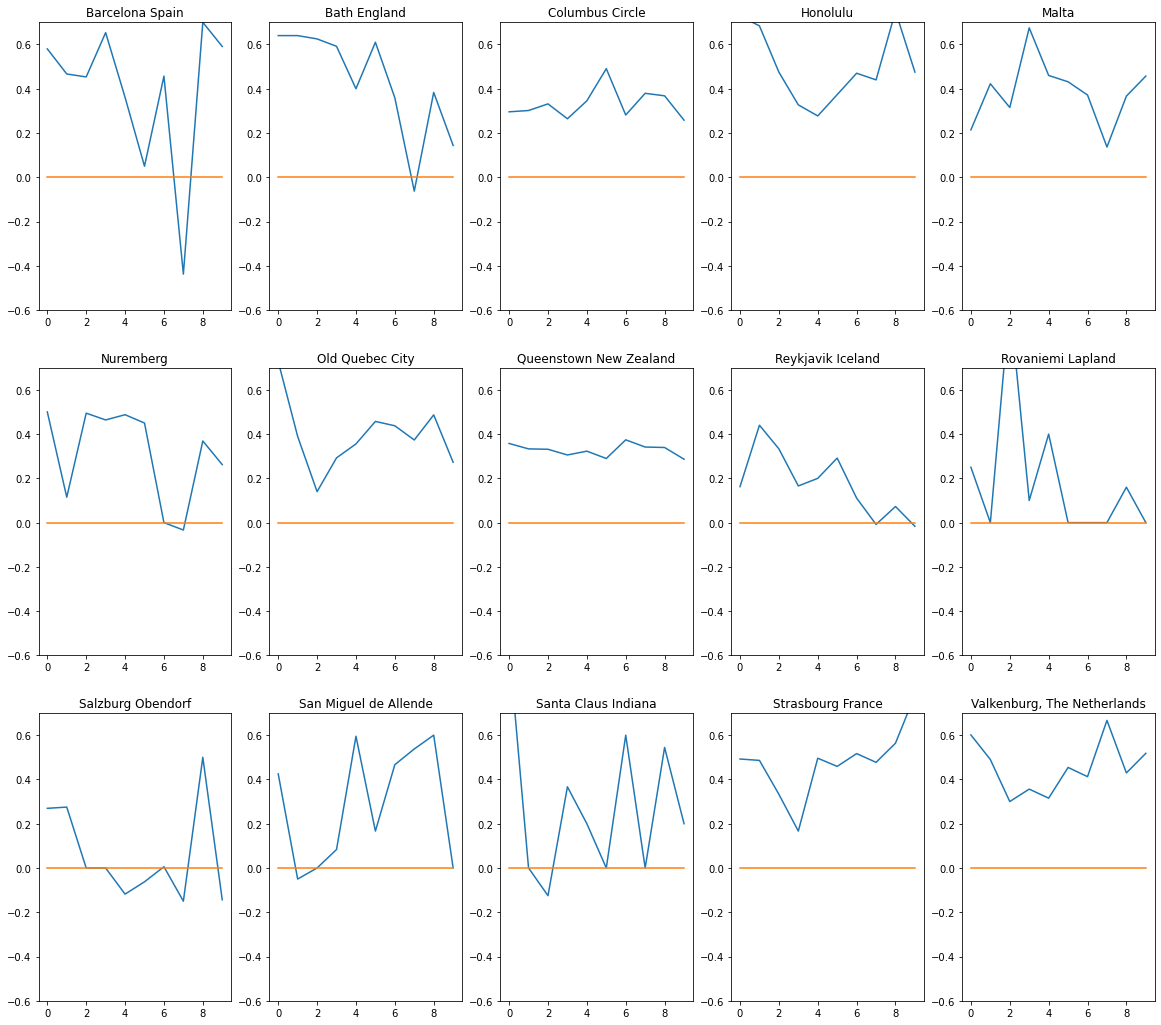

In [376]:
# Show the plot for all place
plt.rcParams['figure.figsize'] = [20,18]

for index, place in enumerate(data1.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_review1[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data1['place1'][index])
    plt.ylim(ymin=-.6, ymax=.7)
    
plt.show()

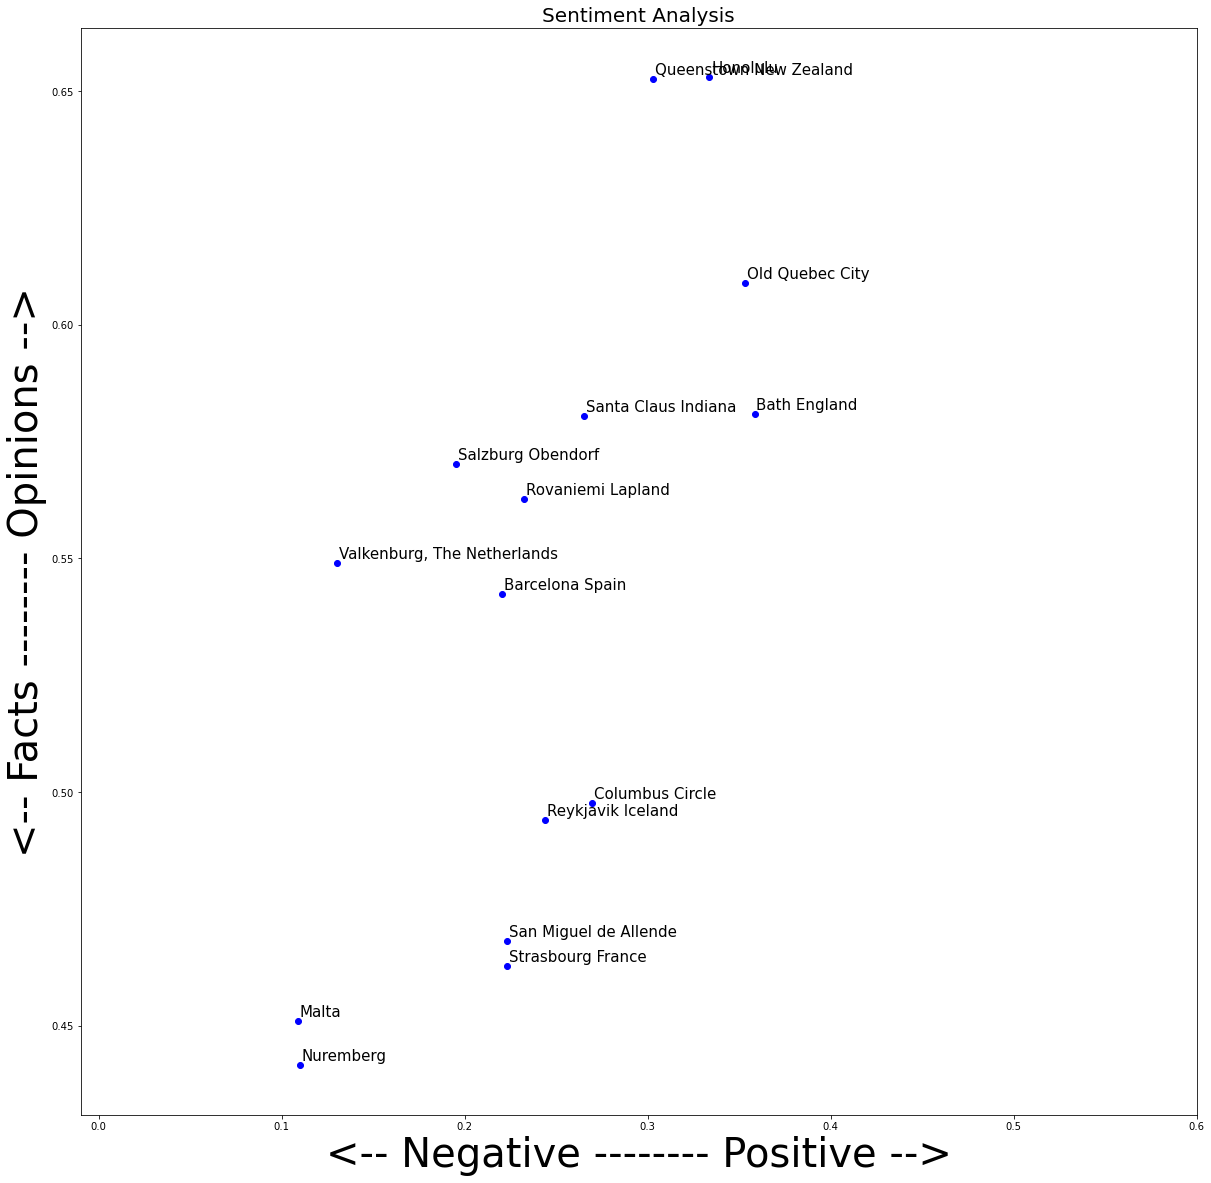

In [473]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]

for index, places in enumerate(data.index):
    x = data.polarity.loc[places]
    y = data.subjectivity.loc[places]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['place'][index], fontsize=15)
    plt.xlim(-.01, .60) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=40)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=40)

plt.show()

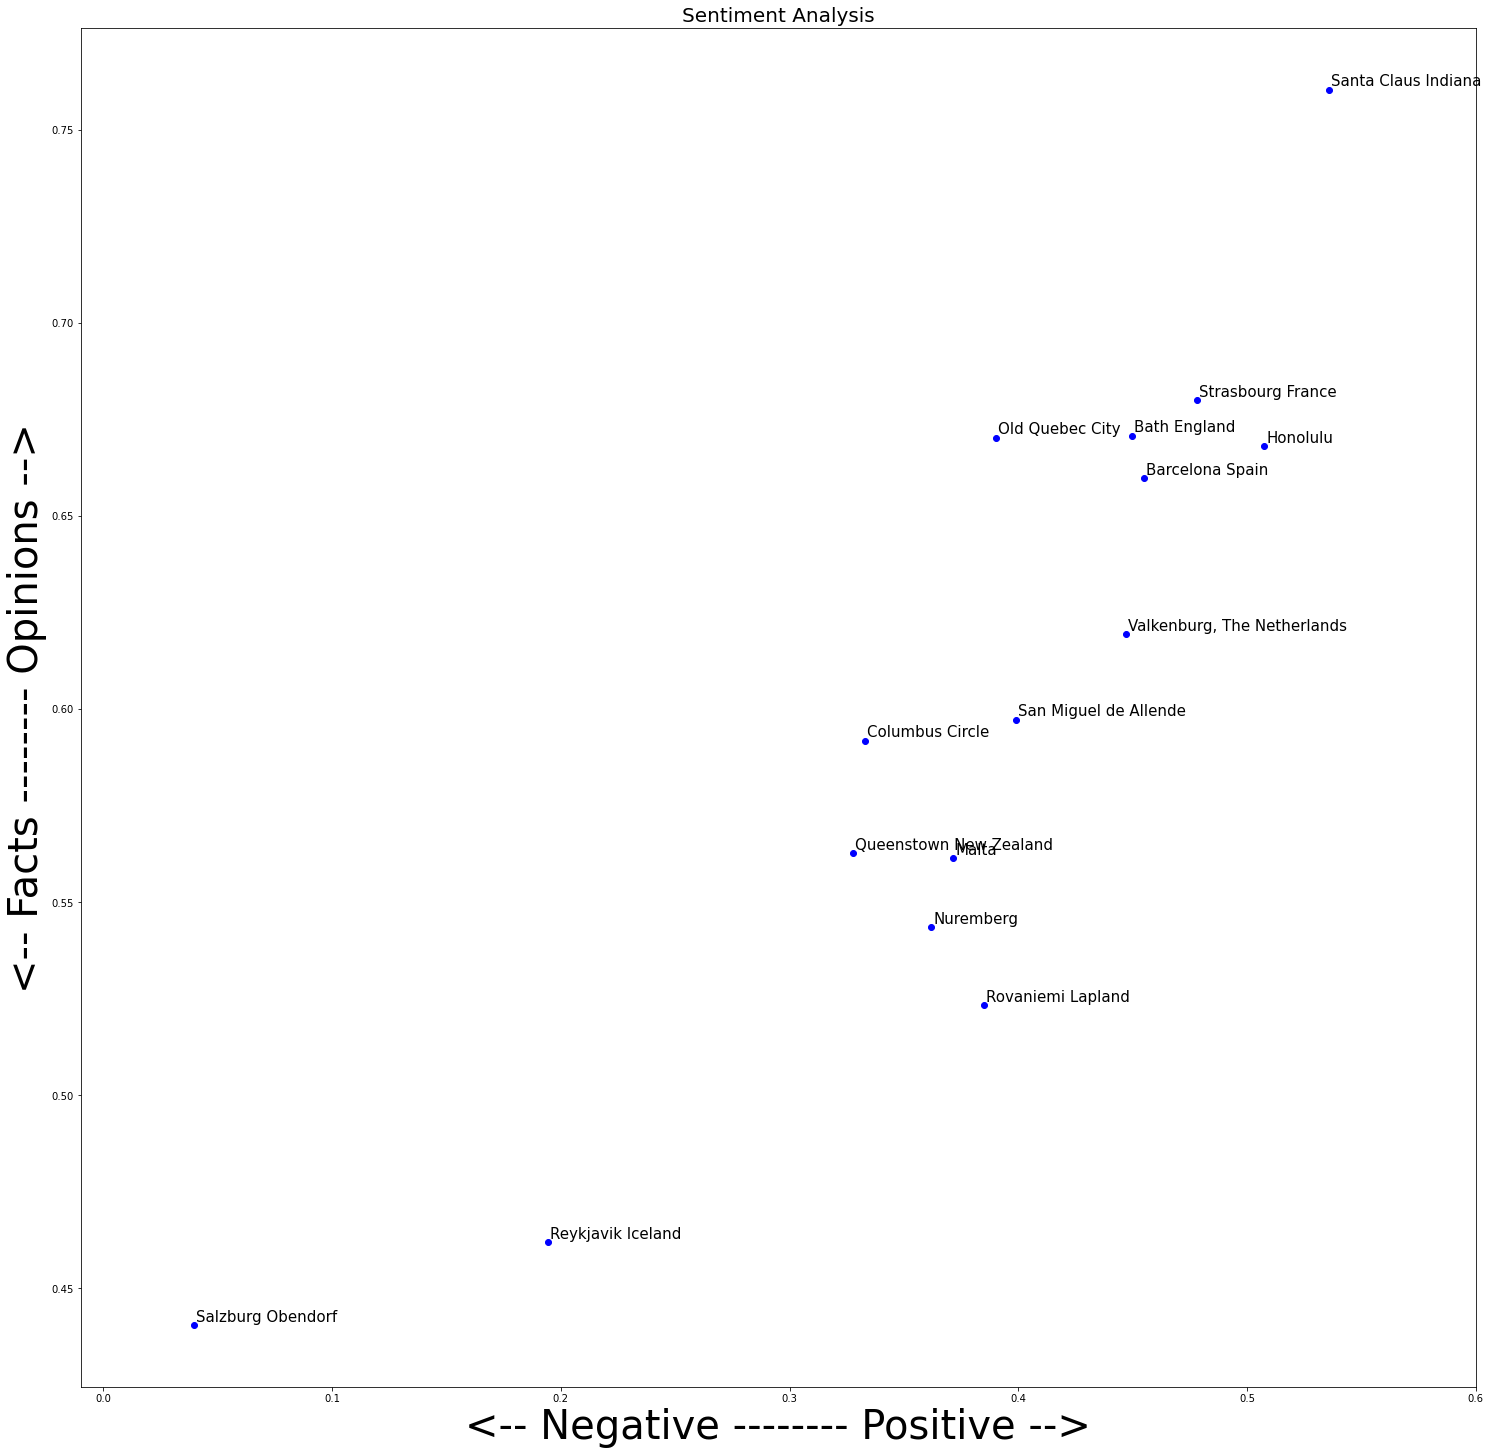

In [461]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25, 25]

for index, places in enumerate(data1.index):
    x = data1.polarity.loc[places]
    y = data1.subjectivity.loc[places]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data1['place1'][index], fontsize=15)
    plt.xlim(-.01,0.6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=40)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=40)

plt.show()

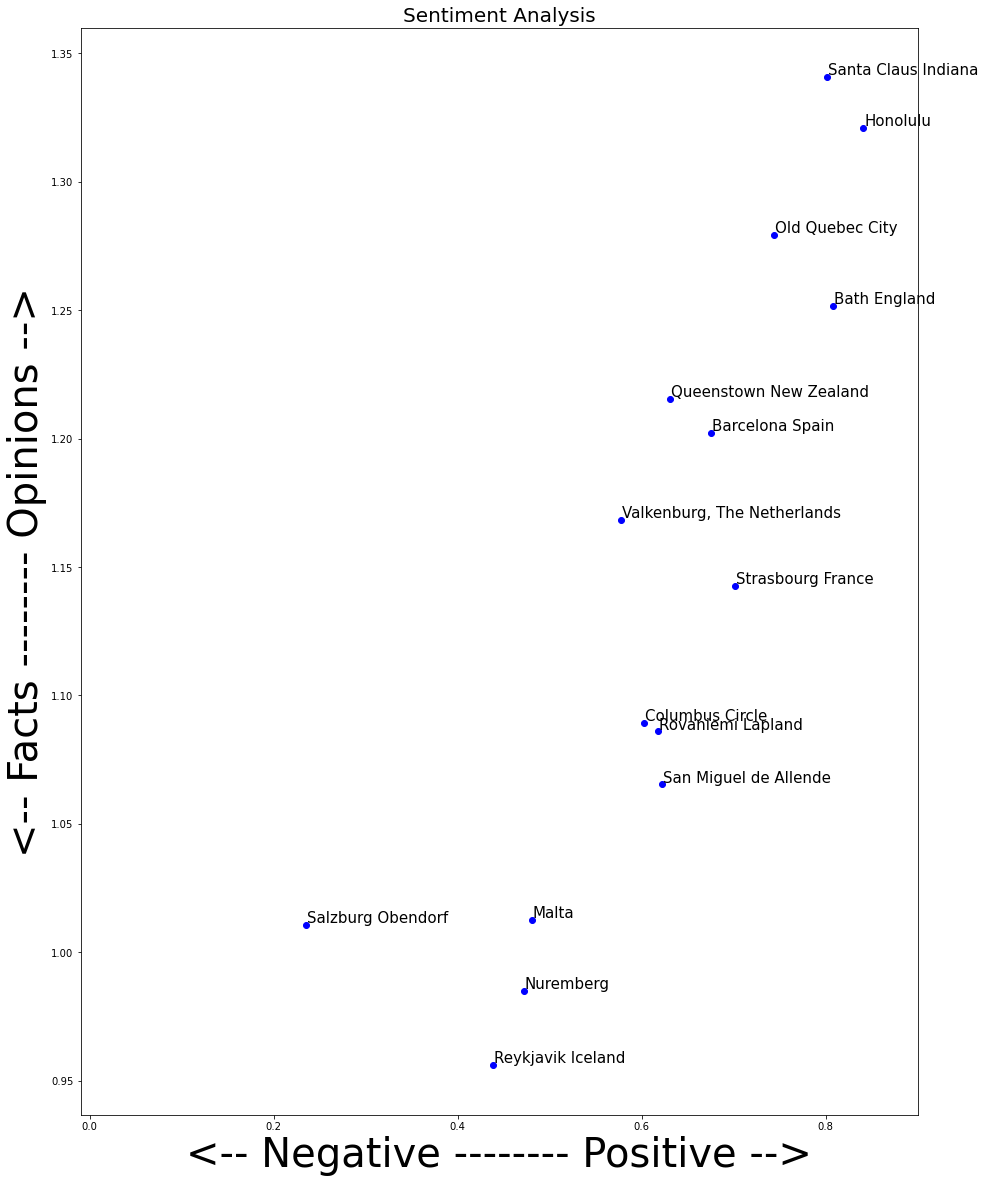

In [409]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 20]

for index, places in enumerate(data.index):
    x = data1.polarity.loc[places]+data.polarity.loc[places]
    y = data1.subjectivity.loc[places]+data.subjectivity.loc[places]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['place'][index], fontsize=15)
    plt.xlim(-.01,0.9) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=40)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=40)

plt.show()